# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing the Libraries

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [351]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


The data has been imported into Data Frame. At very first we will check for the very basic information about the data to understand the data Like No. of rows & columns, datatype, missing values etc. And we will fix the issue accordingly.

# Exploratory Data Analysis

In [352]:
# checking the shape of the data Rows & columns
data.shape

(1470, 35)

In [353]:
# data information: column name, non-null counts, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [354]:
# cross checking of null values if any.
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We have gathered some basic information of our dataset as follows:
* Our dataset has 1470 rows and 35 columns. Pretty big dataset.
* Our dataset has zero null values which is good our data has not any missing values.
* There is 1 problem is that our dataset has 8 object data type columns:
 1. Attrition, 
 2. BusinessTravel, 
 3. EducationField, 
 4. Gender, 
 5. JobRole, 
 6. MaritalStatus, 
 7. Over18, 
 8. OverTime
 
Most of the columns are the categorical data which would be helpfull in encoding and using them as a numeric category for our machine learning data. We will study each columns one by one and will solve their problems accordingly and respectively.

# Data Visualization (EDA)

### 1. Age

In [355]:
# data description of age column
data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

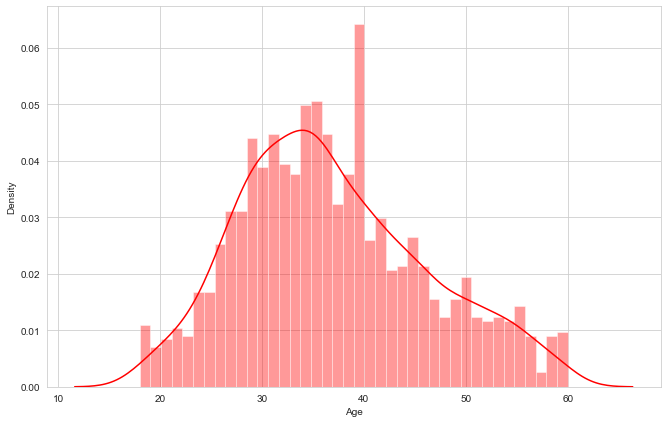

In [356]:
# distribution plot of Age column
plt.figure(figsize = (11,7))
sns.distplot(data['Age'],color = 'red',bins=40,kde = True)

<AxesSubplot:xlabel='Age'>

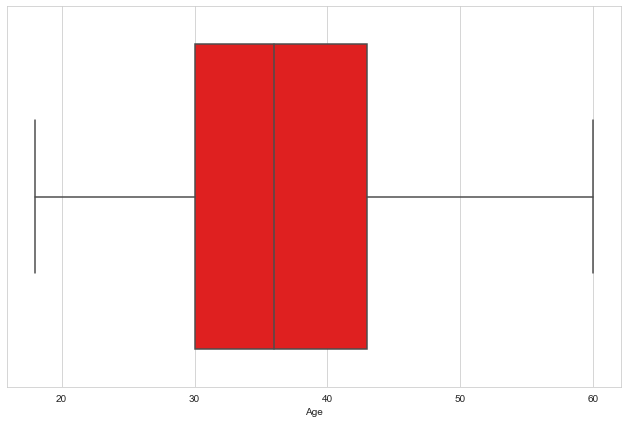

In [357]:
# boxplot of the Age column
plt.figure(figsize = (11,7))
sns.boxplot(data['Age'], color = 'red')

Age column in data set is reffered to the Age of the employees. The above analysis of the age data showes that the data distribution of age is not that perfectly bell curved but quite normally distibuted. The minimum age of employee is 18 yrs. and the maximum age is 60 yrs. If we look at this with common sense which seems to be true as the minimum age of employement is 18 yrs and retirement age is 60 yrs. The average age of employess in organization is almost 37 yrs. Most people in the organization is of age 29 to 40 and the maximum people is of 40. The count of minimum and maximum age is almost equal.
* **Data Distribution is Normal in Age column.**

### 2. Attrition

In [358]:
# data description of Attrition column
data['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

<AxesSubplot:xlabel='Attrition', ylabel='count'>

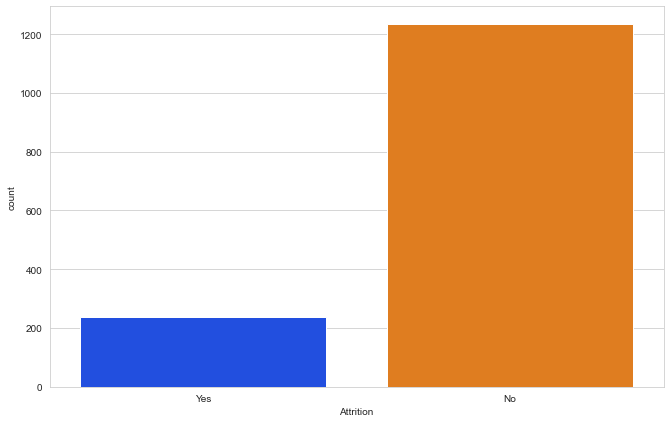

In [359]:
# counplot of the Attrition column
plt.figure(figsize = (11,7))
sns.countplot(data['Attrition'])

The above Analysis is of ```Attrition``` Column, following points noticed during analysis:
1. The Attrition column is the class column of the dataset which Shows the attrition of the employess from the organization.
2. It has two unique values (i) Yes & (ii) No. Which makes it Binary classification.
3. The data type of the column is object type which need to be converted into numeric type for ML algorithms.
4. The data in Attrition column is highly imbalanced as out of 1470 counts only 237 is Yes and 1233 is No. We need to fix this.

#### Encoding the ```Attrition``` column.

In [360]:
leb_enc = LabelEncoder()
Attrition = leb_enc.fit_transform(data['Attrition'])
data['Attrition'] = Attrition
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

<AxesSubplot:xlabel='Attrition', ylabel='count'>

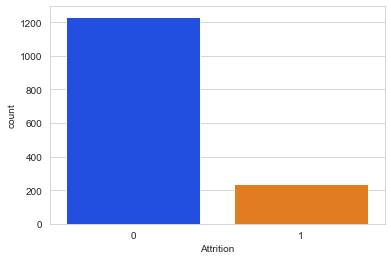

In [361]:
sns.countplot(data['Attrition'])

The Label Encoder converted ```Yes``` to 1 & ```No``` to 0. We are done with encoding of Attrition column and Now we have to look for the class imbalanced and we will solve this imbalance problem just before model building as we need to split the data into features and class for oversampling the data.

### 3. BusinessTravel

In [362]:
# data description of the BusinessTravel
data['BusinessTravel'].describe()

count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object

In [363]:
# counts of the value of the business_travel column
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

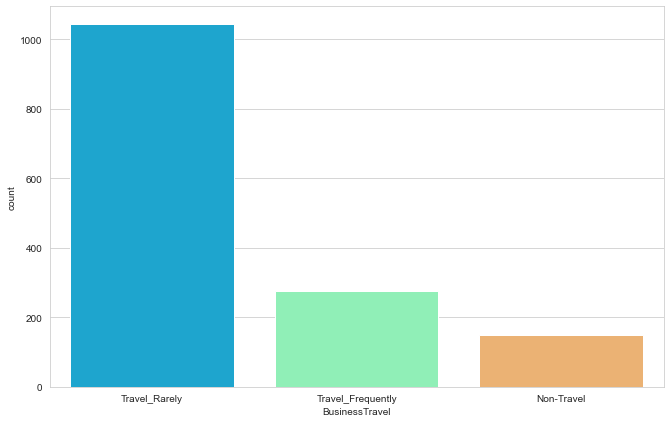

In [364]:
# countplot of the business travel column
plt.figure(figsize = (11,7))
sns.countplot(data['BusinessTravel'], palette = 'rainbow')

The above analysis is of ```BusinessTravel``` column, and following points noticed during analysis:
1. BusinessTravel is the column which is telling, how much an employee travels for business purpose. 
2. It is a categorical column & has 3 unique value (i) Travel_Rarely, (ii) Travel_Frequently, (iii) Non_Travel.
3. The data type of the column is object type so we need to encode it & we are going to do the same in the next step.
4. Rare traveler are the highest frequency is 1043.
5. Frequently Traveler are too less then Rare traveler but greater than Non Traveler frequency is 277.
6. Non traveler are the least one frequency is 150 only.
7. Frequently traveler and Non traveler's frequency is to less than Rare traveler.

#### Encoding the ```BusinessTravel``` column.

In [365]:
BusinessTravel = leb_enc.fit_transform(data['BusinessTravel'])
data['BusinessTravel'] = BusinessTravel
data['BusinessTravel']

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

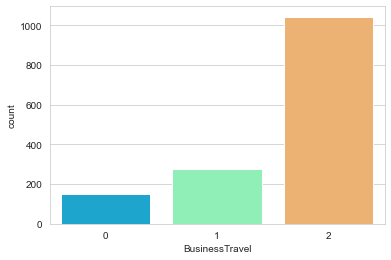

In [366]:
sns.countplot(data['BusinessTravel'], palette = 'rainbow')

Label encoder converted ```Non_travel``` to 0 ```Travel_Frequently``` to 1 and ```Travel_Rare``` to 2. We are done with the encoding of BusinessTravel column. Let's go to the next column.

### 4. DailyRate

In [367]:
# column description
data['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

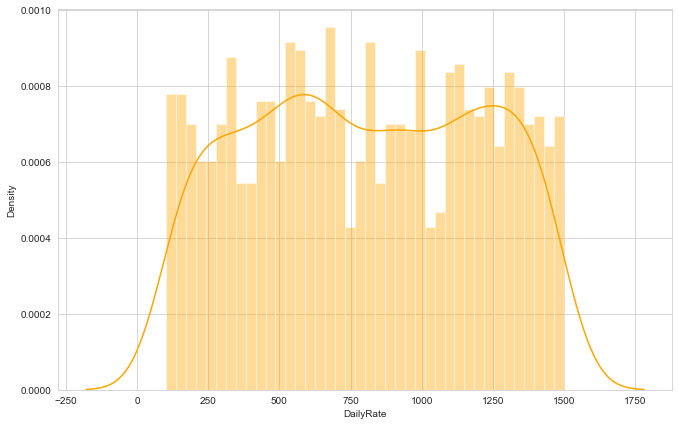

In [368]:
# distribution plot of DailyRate column
plt.figure(figsize = (11,7))
sns.distplot(data['DailyRate'], kde = True, color = 'orange', bins = 40)

<AxesSubplot:xlabel='DailyRate'>

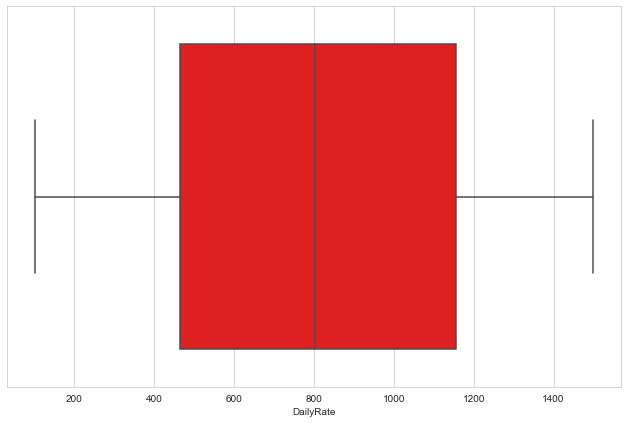

In [369]:
# boxplot of the DailyRate column
plt.figure(figsize = (11,7))
sns.boxplot(data['DailyRate'], color = 'red')

The above analysis is of ```DailyRate``` column. The following points has been observed:
1. The column has continues data.
2. Minimum value is 102.
3. Maximum Value is 1499.
3. The gap between IQR is close to equal, which is a sign of good data
4. Data has no skewness on both side, which is good.

By analyzing above points and by the name of column(DailyRate), I am assuming this column is about the daily componsation of the employee in the organization, This column data looks good and no need to do anything with this column.

### 5. Department

In [370]:
# description of the Department column
data['Department'].describe()

count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object

In [371]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

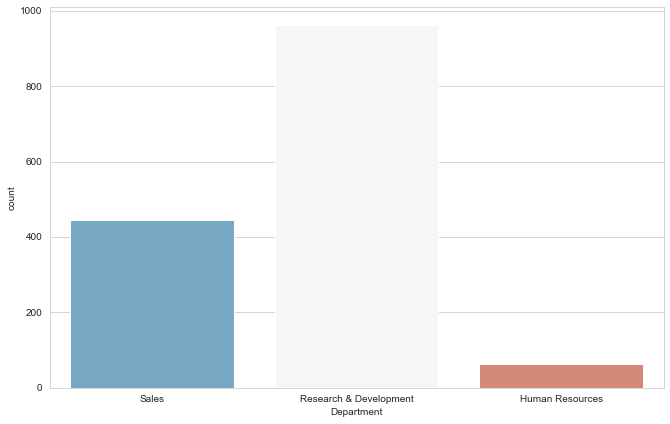

In [372]:
# countplot of the department column
plt.figure(figsize = (11,7))
sns.countplot(data['Department'], palette = 'RdBu_r')

The above analysis is of the```Department``` column, and following points has been observed.

1. The column ```Department``` is about the the department of the organization in which employee works.
2. It is a categorical column & has 3 unique value that means 3 department's data is there in dataset.
3. Most employee works in Research & Development Department frequency is 961.
4. Almost half of Research & Development's employee works in Sales Department frequency is 446.
5. A very few people works in Human Resource department, frequency is 63 only.
6. Data type of the data in Department column is object we need to fix this.

#### Encoding the ```Department``` column.

In [373]:
Department = leb_enc.fit_transform(data['Department'])
data['Department'] = Department

<AxesSubplot:xlabel='Department', ylabel='count'>

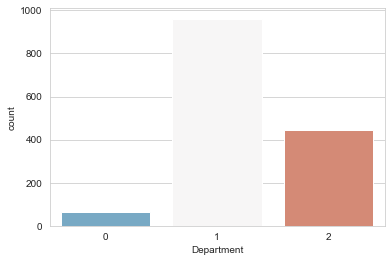

In [374]:
sns.countplot(data['Department'], palette = 'RdBu_r')

Encoding of the Department is done with ```LabelEncoder()```, it has converted Human resource department into 0, Research & Development Department into 1 and Sales Department into 2.

### 6. DistanceFromHome

In [375]:
# description of the column
data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

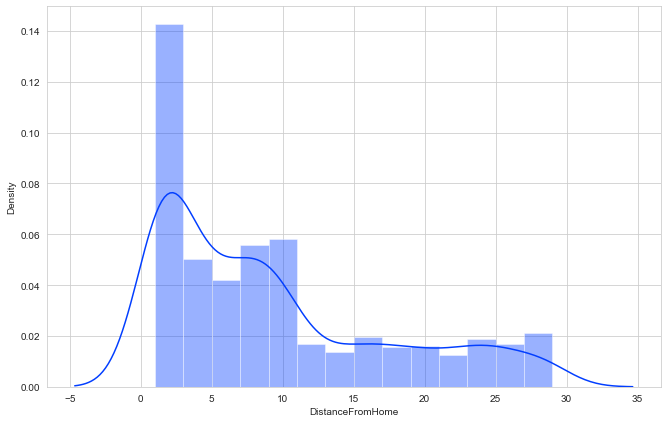

In [376]:
# distribution plot of the DistanceFromHome column
plt.figure(figsize=(11,7))
sns.distplot(data['DistanceFromHome'])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

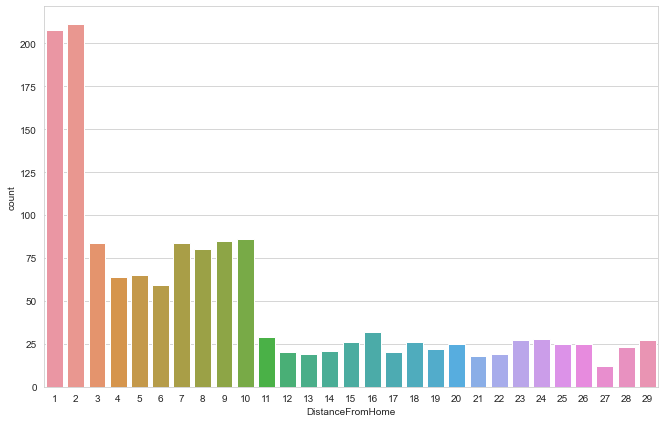

In [377]:
# countplot of DistanceFromHome column
plt.figure(figsize=(11,7))
sns.countplot(data['DistanceFromHome'])

<AxesSubplot:xlabel='DistanceFromHome'>

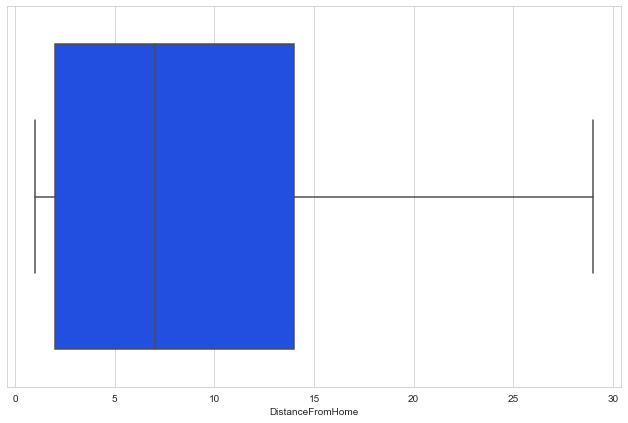

In [378]:
# boxplot of DistanceFromHome column
plt.figure(figsize=(11,7))
sns.boxplot(data['DistanceFromHome'])

The above analysis is of ```DistanceFromHome``` column this column is stating the distance between employee's home to work place. following point has been observed.
1. data is continuous.
2. More than 400 employee's distance between home and office within 2 km.
3. The maximum distance covered by few of empoyees is 29 km.
4. 50% of the employee are within 7 km from work place.
5. 75% of the employees are within 14 km from work place.
6. rest 25% covers the distance of 15 to 29 km.

From above analyzation of the column data seem to look good enough no need to do anything else in this column.

### 7. Education

In [379]:
data['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

In [380]:
data['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

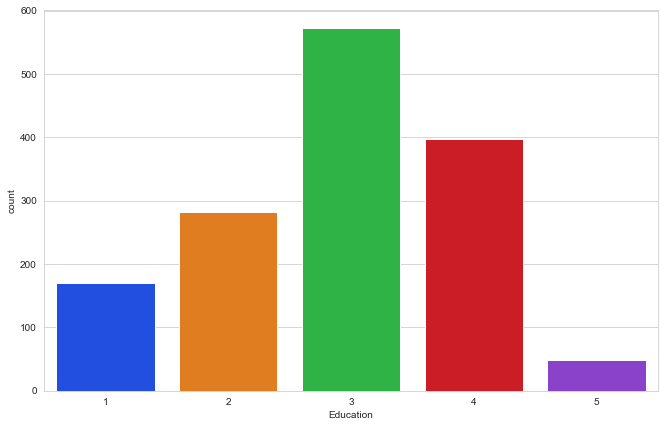

In [381]:
plt.figure(figsize = (11,7))
sns.countplot(data['Education'])

As per name of the column ```Education``` one thing is sure that this column tells us the information about the employee's education and it is a categorical data basically having 5 categories: 1, 2, 3, 4, 5. For me it is hard to interpret the level of education by these 5 categories as if I consider 3 as a Graduation, 4 as a 4 year Graduation and 5 as a post graduation, then what 1 and 2 would be. 

I will leave this this thing right here as of now the most important thing for me is there should be no null value in it no object data type should be in it and data should be normal and all these things have analyzed and are good to go.

### 8. EducationField

In [382]:
# description of the 
data['EducationField'].describe()

count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object

In [383]:
# all categorical value counts of EducationField
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

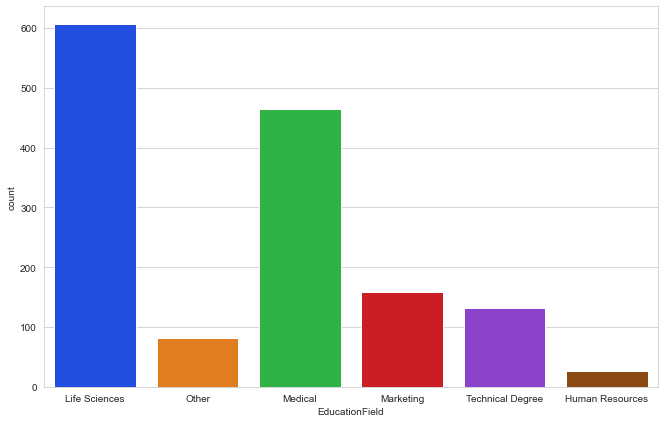

In [384]:
# countplot of EducationField
plt.figure(figsize = (11,7))
sns.countplot(data['EducationField'])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

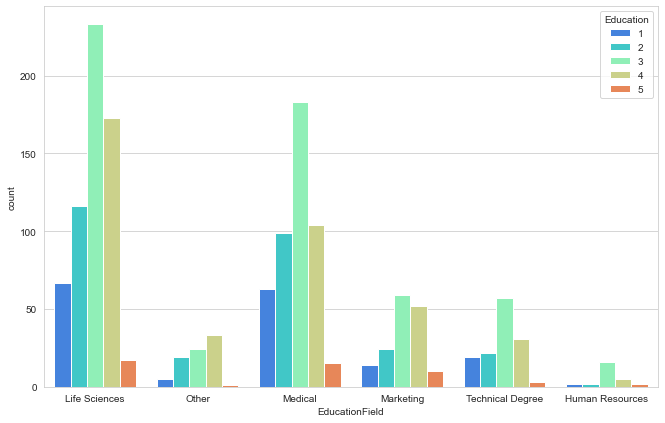

In [385]:
# Bivariate count plot of Education and EducationField
plt.figure(figsize = (11,7))
sns.countplot(x = 'EducationField', hue = 'Education',data = data, palette = 'rainbow')

Above analyzation is of column ```EducationField``` and the relationship of ```EducationField``` with ```Education``` column, following are the observations:

**EducationField**
1. EducationField is a categorical column having data of 6 categories of education field from which employees have done their education. these are: 1) Life Science, 2) Medical, 3) Marketing, 4) Technical Degree, 5) Human Resource, 6) Others.
2. Highest people have done their education from Life Science field frequency is 606.
3. Lowest people have done their education from HR field, frequency is 27.
4. Column is having object data type, will fix this by encoding in next step.
**Relationship between Education & EducationField**
1. We can see that each category of EducationField is having all the 5 level of education in which all the education field is having level 3 education is higest axcept others and level 4 education is 2nd highest in other it is highest.
2. level 5 education is least in all the category of education field.

#### Encoding of ```EducationField``` column.

In [386]:
# label Encoding of Education Field column
EducationField = leb_enc.fit_transform(data['EducationField'])
data['EducationField'] = EducationField
data["EducationField"]

0       1
1       1
2       4
3       1
4       3
       ..
1465    3
1466    3
1467    1
1468    3
1469    3
Name: EducationField, Length: 1470, dtype: int32

<AxesSubplot:xlabel='EducationField', ylabel='count'>

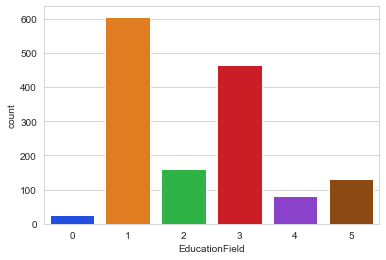

In [387]:
# checking the encoded categories by ploting the countplot of EducationField
sns.countplot(data['EducationField'])

The column has been encoded successfully by Label Encoder it has converted as follows:
* HR => 0
* Life Science => 1
* Marketing => 2
* Medical => 3
* Other => 4
* Technical Degree => 5

### 9. EmployeeCount

In [388]:
# Description of EmployeeCount column
data['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [389]:
# count of value of column EmployeeCount
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

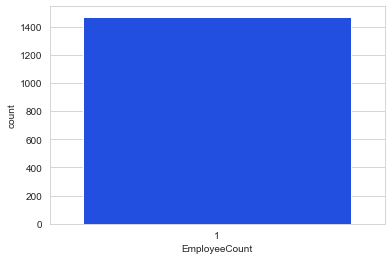

In [390]:
# count plot of EmployeeCount column
sns.countplot(data['EmployeeCount'])

EmployeeCount is a column in our dataset which has only one category value and that value is one which is common for all the rows. The column's name is Employee Count and each row of the data provides the information of an individual employee that means this column is basically telling the number of employee in any particular row, which is useless as each employee's data is itself unique there is no sense of telling the count of employee in an individual employee's details. we will check it's correlation with other column later and if we will find no use of this column we will drop this column. Most probably we will drop this column as it seems no use of this column in our model building.

### 10. EmployeeNumber

In [391]:
# description of the EmployeeNumber column
data['EmployeeNumber'].describe()

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

In [392]:
data['EmployeeNumber'].value_counts()

2048    1
1368    1
1364    1
1363    1
1362    1
       ..
648     1
647     1
645     1
644     1
2046    1
Name: EmployeeNumber, Length: 1470, dtype: int64

<AxesSubplot:xlabel='EmployeeNumber'>

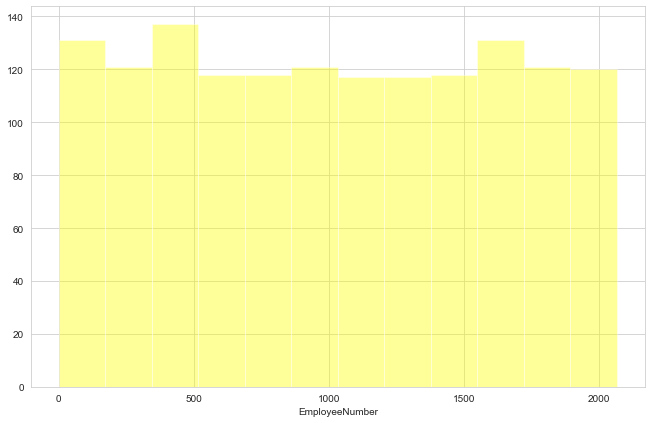

In [393]:
plt.figure(figsize = (11,7))
sns.distplot(data['EmployeeNumber'], kde = False, color = 'yellow')

As the column name says (EmployeeNumber) and this column has every value is unique value ascending in order, which indicates that this column is a employee's unique identification number provided them serielly from 1 to 2068 which makes it absolute number which we do not need in our machine learning model building we will look it's relation with other columns and than we will decide about it.

### 11. Environmentsatisfaction

In [394]:
# description of EnvironmmentSatisfaction
data['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

In [395]:
# value counts of EnvironmentSatsfaction column
data['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

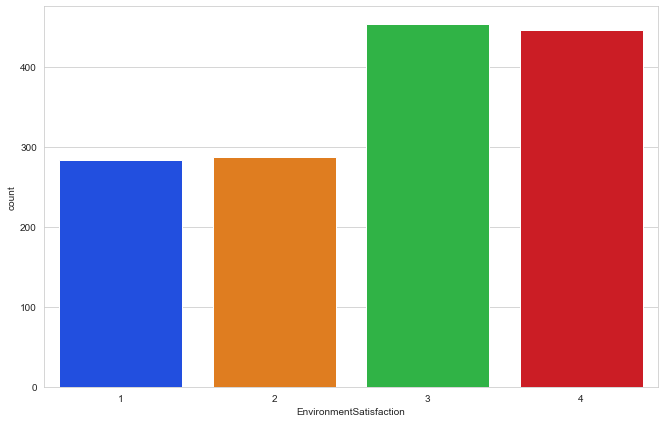

In [396]:
# count plot of EnvironmentSatisfaction
plt.figure(figsize = (11,7))
sns.countplot(data['EnvironmentSatisfaction'])

The above analysis is of EnvironmentSatisfaction column & following points has been observed:
1. This column is also a categorical column of value in it 1, 2, 3, 4.
2. It seems to be a column of rating related to satisfaction of employee in workplace environment having 1 as least satisfaction and 4 as most satisfaction or it can be vice versa as well.
3. value 3 has more count 453 followed by value 4 count is 446, & value 1 has least count that is 284.
4. Right now this column seems to be good to go ahead we will check it's relation with our target column Attrition in next step.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

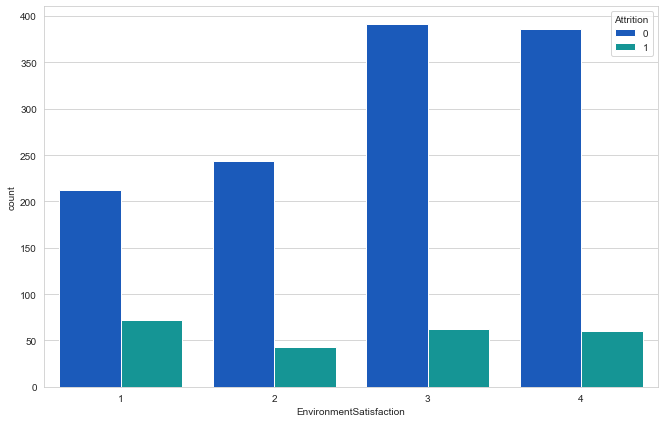

In [397]:
# bivariate count plot of EnvironmentSatisfaction and Attrition
plt.figure(figsize = (11,7))
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = data, palette = 'winter')

From above analysis of relationship between Environmentsatifaction and Attrition it can be seen that Attrition = 0 is least in EnvironmentSatisfaction = 1, and most in EnvironmentSatisfaction 3 & 4, that means when employee is most satisfied than the probability of their Attrition from the organization is less and when employee is least satisfied from work environment than the probability of their Attrition is most as it's shown in above figure Attrition = 1 is highest at EnvironmentSatisfaction = 1 & almost equal at EnvironmentSatisfaction 3, 4.

### 12. Gender

In [398]:
# description of Gender column
data['Gender'].describe()

count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object

In [399]:
# value count of Gender column
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

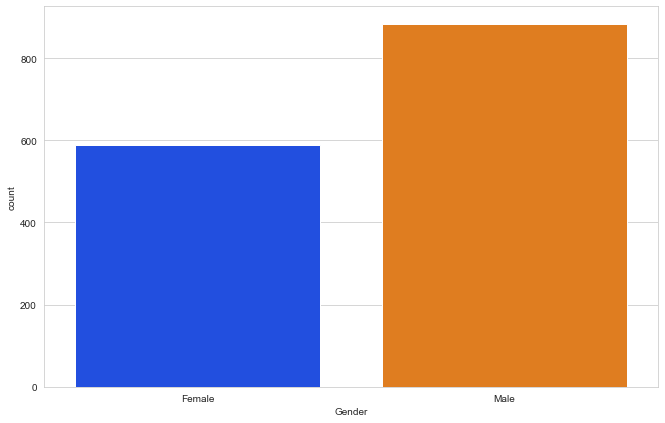

In [400]:
# countplot of Gender column
plt.figure(figsize = (11,7))
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

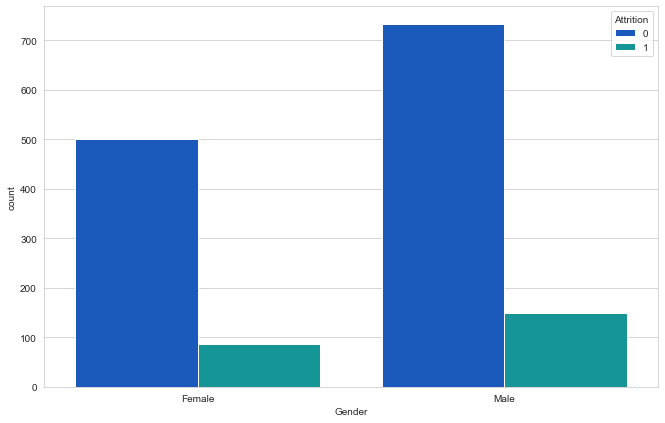

In [401]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'Gender', hue = 'Attrition', data = data, palette = 'winter')

The above analysis is of ```Gender``` column and relationship between Gender and Attrition. following points has bee observed:
* **Gender**
1. This column is telling wheather an employee is Male or Female.
2. it's a categorical column having object data type which we need to fix and we'll fix it in next step.
* **Relationship between Gender & Attrition**
1. It can be seen that Attrion of MAle is more than female
2. Out of 588 almost 500 female has not been attrited from the organization and whareas out of 882 Male close to 140 male has been Attrited from the organization.

#### Encoding of ```Gender``` column.

In [402]:
Gender = leb_enc.fit_transform(data['Gender'])
data['Gender'] = Gender
data['Gender']

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int32

<AxesSubplot:xlabel='Gender', ylabel='count'>

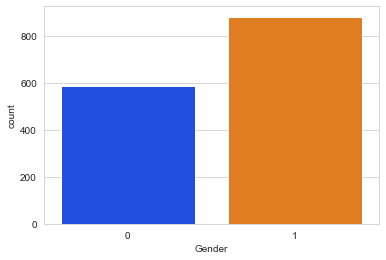

In [403]:
sns.countplot(data['Gender'])

Gender column has been successfullu encoded the Label Encoder has converted Female into 0, and Male into 1.

### 13. HourlyRate

In [404]:
# description of hourly rate column
data['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

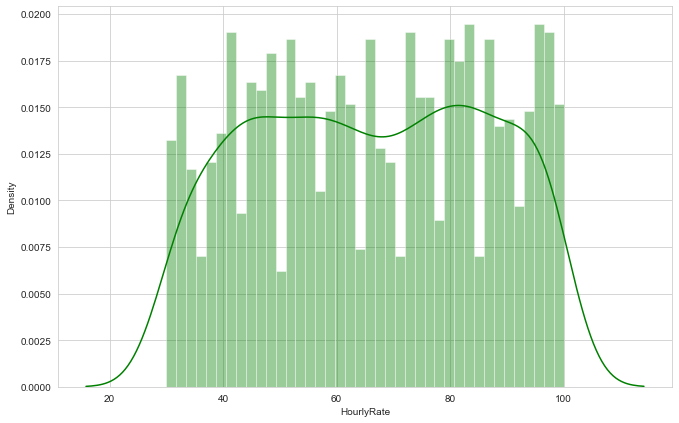

In [405]:
# distplot of HourlyRate column
plt.figure(figsize = (11,7))
sns.distplot(data['HourlyRate'], kde = True, bins=40, color = 'green')

<AxesSubplot:xlabel='HourlyRate'>

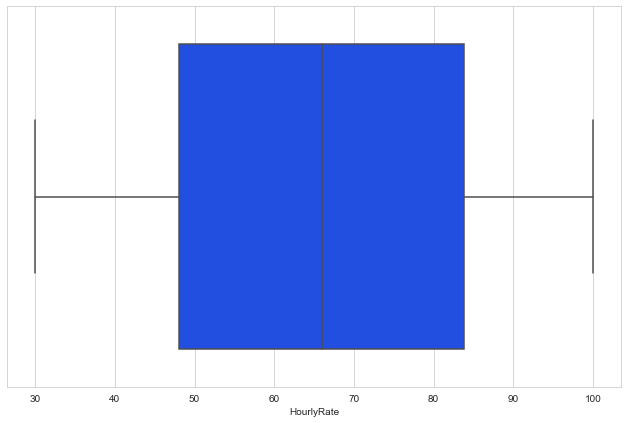

In [406]:
# boxplot of HourlyRate column
plt.figure(figsize=(11,7))
sns.boxplot(data['HourlyRate'])

The above analysis is of ```HourlyRate``` column. The following points has been observed:
1. The data inside the column is continuous and normally distributed.
2. Minimum HourlyRate is 30 and maximum is 100.
3. As Per name of column suggest Hourly Rate of an employee may be it is some kind of compenssation of employee but it's calculation is not matching with DailyRate also there is other columns named as MonthlyRate & MonthlyIncome we will study about these Later. till now data looks good of this column o move ahead.

### 14. JobInvolvement

In [407]:
# description JobInvolvement Column
data['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [408]:
data['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

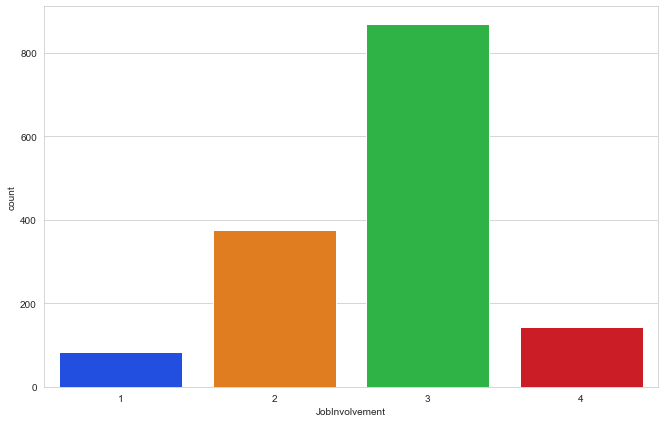

In [409]:
# countplot of JobInvolvement column
plt.figure(figsize = (11,7))
sns.countplot(data['JobInvolvement'])

The above analysis is of ```JobInvolvement``` column and following points has been observed:
1. JobInvelvement column represents the involvement in his/her job, how involve an employee is towards his/her provided job task . May be 4 for the most involvement and 1 for the least involvement.
2. This is a categorical column having 4 categories: 1, 2, 3 & 4.
3. column's data type is Integer, so need to worry to send it to ML algorithm.
4. involvement 3 has most count followed by involvement 2 and involvement 1 has least count.

We will check it's relationship with the target column for further analysis of this column.

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

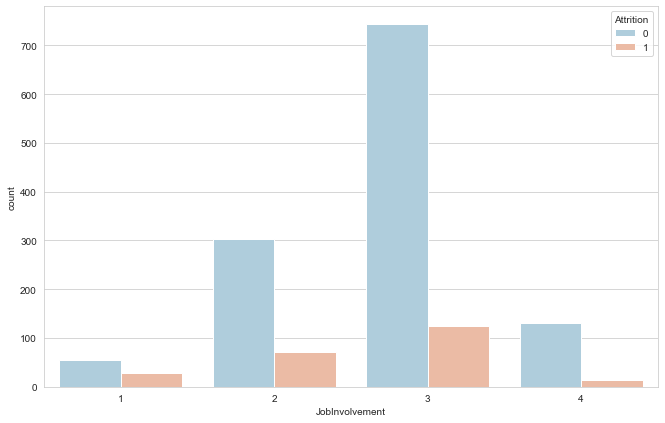

In [410]:
# countplot of relationship between JobInvolvement and Attrition.
plt.figure(figsize = (11,7))
sns.countplot(x = 'JobInvolvement', hue = 'Attrition',data = data, palette = 'RdBu_r')

1. Job attrition of an employee is highest at JobInvolvement 3 and 2nd highest at JobInvolvement 2. and least at JobInvolvement 4
2. According to me the relation between both the column has influence of counts of the employees in JobInvolvement column.
3. It can be seen that count of JobInvolvement 1 is least but attrition of th employee at 1 is greater than 4. By which may be it can be interpreted as chances of an employee's attrition = No is going to be high if Jobinvolvement would be greater.

### 15. JobLevel

In [411]:
# description of JobLevel column
data['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [412]:
# Value counts of JobLevel column
data['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

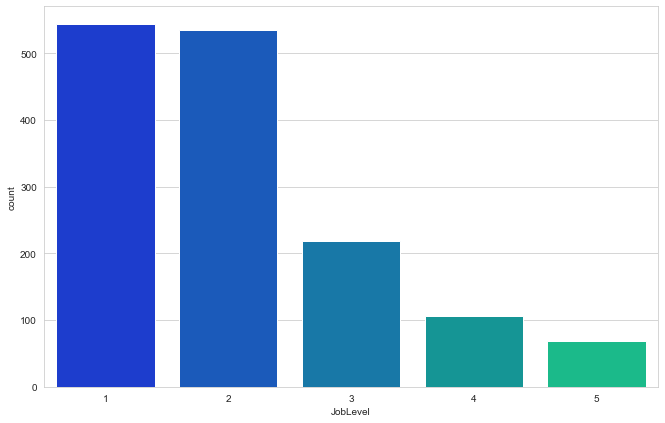

In [413]:
# countplot of JobLevel column
plt.figure(figsize = (11,7))
sns.countplot(data['JobLevel'], palette = 'winter')

The above analysis is of column ```JobLevel``` and following observation has been noted:
1. JobLevel column represents the lavel of job in terms of position or seniority and juniority.
2. 5 levels are there in the organization.
3. most people's job level is 1 and 2 almost 75% people are at level 1 and 2.
4. least people are level 5 and it's decreasing gradually from level 1 to 5. By which it can be interpreted that organization have 5 levels of position and 1 and 2 level are the most junior levels and 5 is most senior level.

### 16. JobRole

In [414]:
# description of the JobRole column
data['JobRole'].describe()

count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object

In [415]:
# value counts of JobRole column
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Text(0.5, 0, 'JobRole')

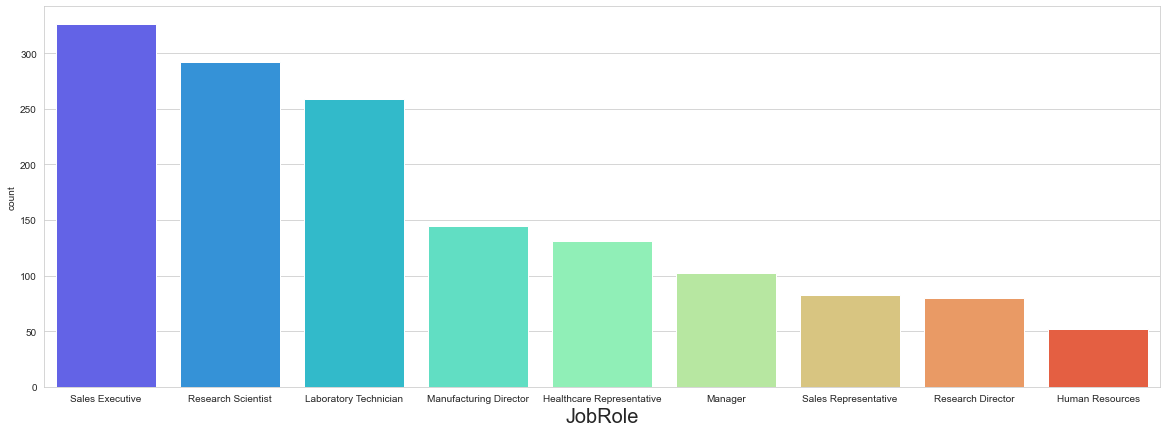

In [416]:
# countplot of JobRole column
plt.figure(figsize = (20,7))
sns.set_style('whitegrid')
sns.countplot(data['JobRole'], palette = 'rainbow')
plt.xlabel('JobRole', fontsize = 20)

The above analysis is of ```JobRole``` column and following observation has been noted:
1. This column is about various Job roles available in the organization.
2. there is 9 kind of job role in the organization.
3. the column has categorical data and 9 categories are there.
4. Data type of the column is object which need to be fixed.
5. Sales Executives are highest number of employees followed by Research Scientist & Human Resources have least nno. of employees followed by Research Director.

Text(0.5, 0, 'JobRole')

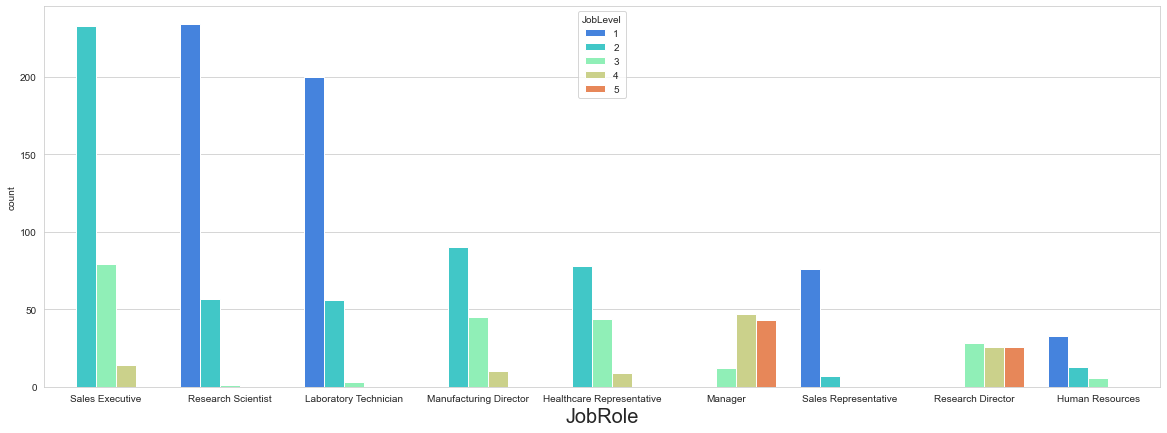

In [417]:
# countplot of relationship between JobRole and JobLevel
plt.figure(figsize = (20,7))
sns.set_style('whitegrid')
sns.countplot(x = 'JobRole',hue = 'JobLevel', data = data, palette = 'rainbow')
plt.xlabel('JobRole', fontsize = 20)

By above plot the relationship between JobRole and JobLevel can be seen.
* Sales Executive have level 2, 3 & 4 jobs. Level 4 is very few and Level 2 is very high.
* Research Scientist have level level 1, 2 & 3 jobs, Level 1 is very high and level 3 is very few.
* Laboratory Technician have level 1, 2 & 3, level 1 is high and level 3 is very few.
* Manufecturing Director have level 2, 3 & 4 level 2 is high and level 4 is few.
* Healthcare Representative have level 2, 3, & 4 same in order as above.
* Manager has level 3, 4 & 5, level 3 managers are few and level 4 managers are high almost close to level 5 mangers.
* Sales Representatives have level 1 & 2 Jobs only, Level 1 is high and 2 is very low.
* Research Director have level 3, 4 & 5 jobs almost close to each other level 3 is high.
* Human Resource have level 1 , 2 & 3 jobs level 1 is high and level 3 is low.

Managers and Research Directors are the senior most jobs in the organization

#### Encoding of ```JobRole``` column.

In [418]:
JobRole = leb_enc.fit_transform(data['JobRole'])
data['JobRole'] = JobRole
data['JobRole']

0       7
1       6
2       2
3       6
4       2
       ..
1465    2
1466    0
1467    4
1468    7
1469    2
Name: JobRole, Length: 1470, dtype: int32

<AxesSubplot:xlabel='JobRole', ylabel='count'>

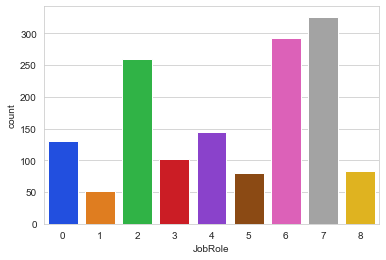

In [419]:
sns.countplot(data['JobRole'])

Label Encoder has converted object data type into integer data type of JobRole column.
* Sales Executive = 7
* Research Scientist = 6
* Laboratory Technician = 2
* Manufecturing Director = 4
* Healthcare Representative = 0
* Manager = 3
* Sales Representative = 8
* Research Director = 5
* Human Resource = 1

### 17. JobSatisfaction

In [420]:
# description of the JobSatisfaction column
data['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [421]:
# value counts of Jobsatisfaction column
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

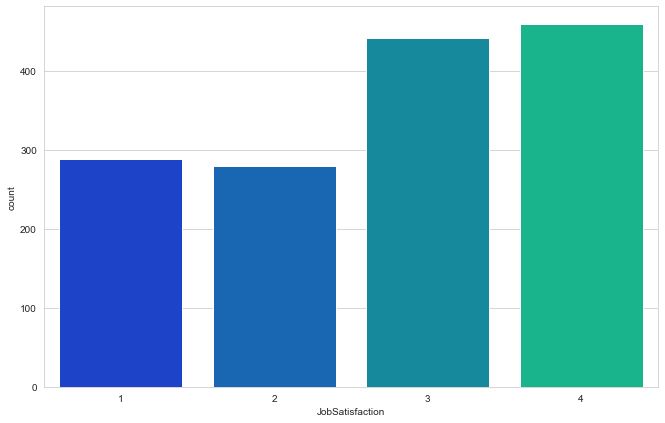

In [422]:
# counplot of the JobSatisfaction column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['JobSatisfaction'], palette = 'winter')

Above analysis is of column ```JobSatisfaction``` and following points has been observed:
1. JobSatisfaction is categorical column related to how how satisfied an employee is from his Job.
2. It has 4 categories 1, 2, 3 & 4.
3. Most probably 1 is for least satisfied and 4 is for most satisfied, we can check it comparing the target column in next step.
4. Job satisfaction 4 has highest count of employee followed by 3 and 2 has least count of employees.

Text(0.5, 0, 'JobSatisfaction')

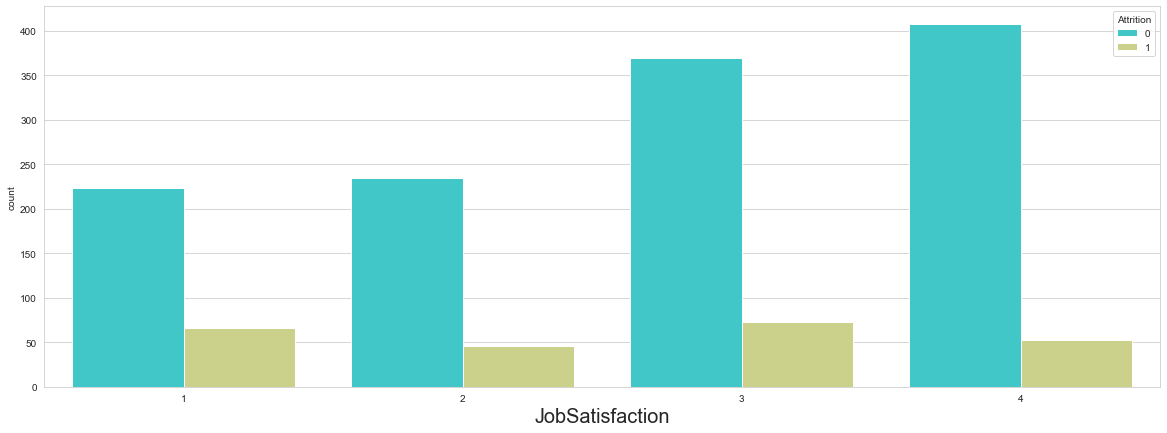

In [423]:
# countplot of relationship between JobSatisfaction and Attrition
plt.figure(figsize = (20,7))
sns.set_style('whitegrid')
sns.countplot(x = 'JobSatisfaction',hue = 'Attrition', data = data, palette = 'rainbow')
plt.xlabel('JobSatisfaction', fontsize = 20)

* JobSatisfaction 3 has more attrition and 2 has least attrition.
* But we can see that JobSatisfaction 3 & 4 has highest no. of No Attrition(Attrition = 0) and 1 has least no. of No Attrition.
* Also we can compare the ratio of Attrition(0 & 1) at JobSatisfaction 1, it's Attrition is high compare to other Jobsatisfaction level and very low No Attrition(Attrition=0)
* Same as point no. 3 with JobSatisfaction level 4 the ratio is telling No Attrition is high compare but Attrition is low compare to other JobSatisfaction levels.
* From these following points it can be interpreted as 1 is for least satisfied and 4 is for most satisfied in JobSatisfaction column.

### 18. MaritalStatus.

In [424]:
# description of the maritalstatus column
data['MaritalStatus'].describe()

count        1470
unique          3
top       Married
freq          673
Name: MaritalStatus, dtype: object

In [425]:
# value counts of the MaritalStatus column
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Text(0.5, 0, 'MaritalStatus')

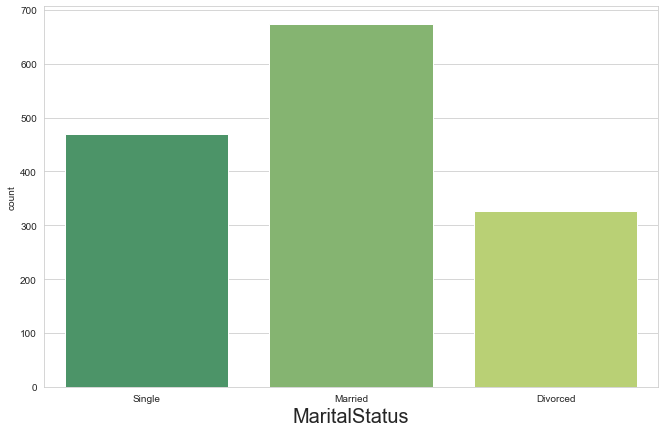

In [426]:
# Count plot of the MaritalStatus column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['MaritalStatus'], palette = 'summer')
plt.xlabel('MaritalStatus', fontsize = 20)

```MaritalStatus``` column analysis:
* As per name suggest column is related to the marital status of the employee.
* It's a categorical column having object data type telling whether an employee is Married, Single or Divirced.
* we'll fix the object data type with label Encoder.
* Most people are married and least people are divorced but still the count of Divorced is high more than 300.
* It seems this is the organization having large number of Divorced employee working in it.

#### Encoding the ```MaritalStatus``` column.

In [427]:
MaritalStatus = leb_enc.fit_transform(data['MaritalStatus'])
data['MaritalStatus'] = MaritalStatus
data['MaritalStatus']

0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: MaritalStatus, Length: 1470, dtype: int32

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

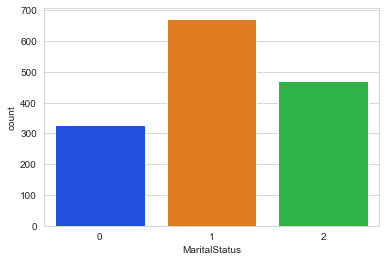

In [428]:
sns.countplot(data['MaritalStatus'])

Label Encoder has converted:
* Single to 0
* Married to 1, and
* Divorced to 2

### 19. MonthlyIncome.

In [429]:
# description of the MonthlyIncome column
data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

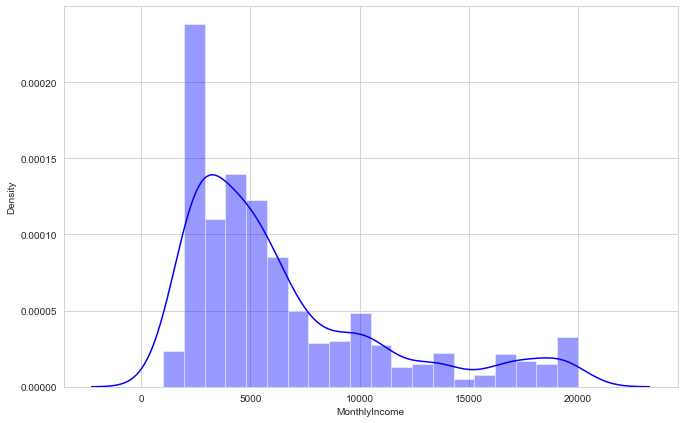

In [430]:
# distribution plot of the MonthlyIncom column
plt.figure(figsize = (11,7))
sns.distplot(data['MonthlyIncome'], color = 'Blue')

<AxesSubplot:xlabel='MonthlyIncome'>

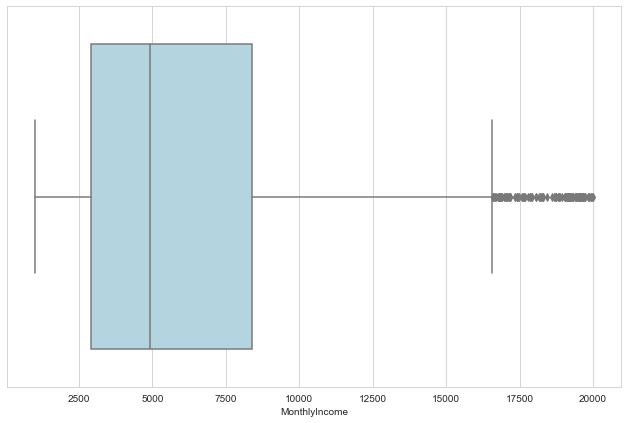

In [431]:
# boxplot of the MonthlyIncome column
plt.figure(figsize = (11,7))
sns.boxplot(data['MonthlyIncome'], color = 'lightblue')

Analysis of ```MonthlyIncome``` column:
* Data is related to componsation of the employee.
* it's continuous data.
* Data distribution is right skewed as shown in the distplot.
* Most of the data is distributed 6000 to 8000. and rest of the data is from 8000 to 20000 with very low frequency which is making it rightly skewed.
* Boxplot is showing large amount of outliers in the column which need to be fixed we'll fix this before model building after analyzing of all the columns.

### 20. MonthlyRate.

In [432]:
# description of the Monthly column
data['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

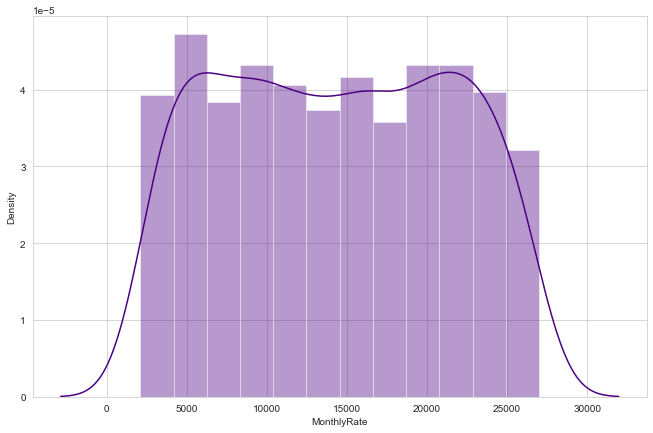

In [433]:
# distribution plot of the MonthlRate column
plt.figure(figsize = (11,7))
sns.distplot(data['MonthlyRate'], color = 'indigo')

<AxesSubplot:xlabel='MonthlyRate'>

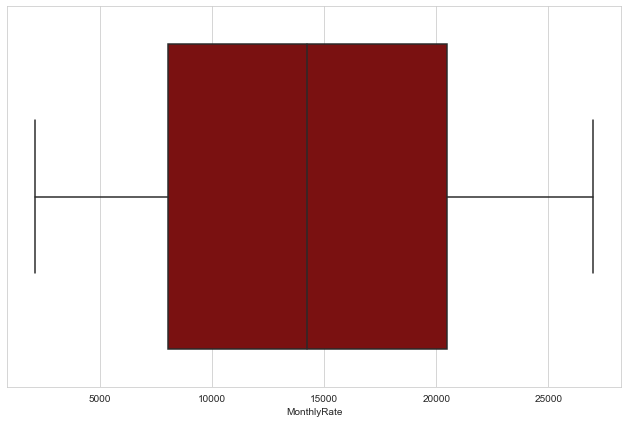

In [434]:
# boxplot of the MonthlyIncome column
plt.figure(figsize = (11,7))
sns.boxplot(data['MonthlyRate'], color = 'darkred')

Analysis of ```MonthlyRate``` column:
* Data name says Monthly Rate seems like componsation of the employees, but we already have Monthly income column stating as Income of the employee but that data doesn't match with the INR as the minimum there was 1000 and maximum was 20000 which doesn't look realistic.
* Same with this column minimum is around 2000 and maximum is 27000. It might be a currency in Doller.
* Data Distribution in column MonthlyRate is distributed normally no skewness is there.
* Box plot is also showing no outliers in the column.
* Data is good to go.

### 21. NumCompaniesWorked.

In [435]:
# description of the NumCompaniesWorked column
data['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [436]:
# value counts of the NumCompaniesWorked column
data['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

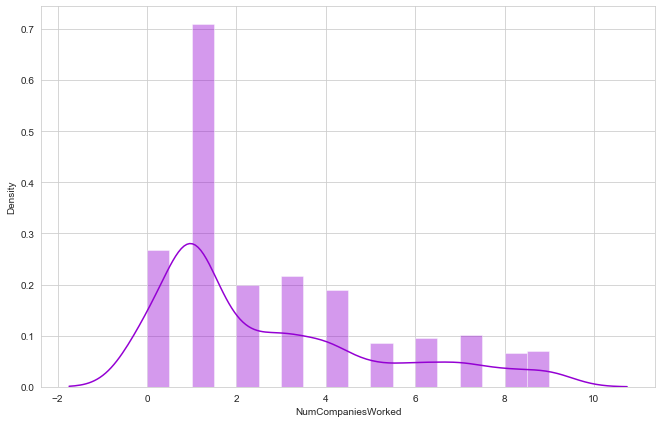

In [437]:
# distribution plot of the NumCompaniesWorked column
plt.figure(figsize = (11,7))
sns.set_palette('bright')
sns.distplot(data['NumCompaniesWorked'], color = 'darkviolet')

Text(0.5, 0, 'NumCompaniesWorked')

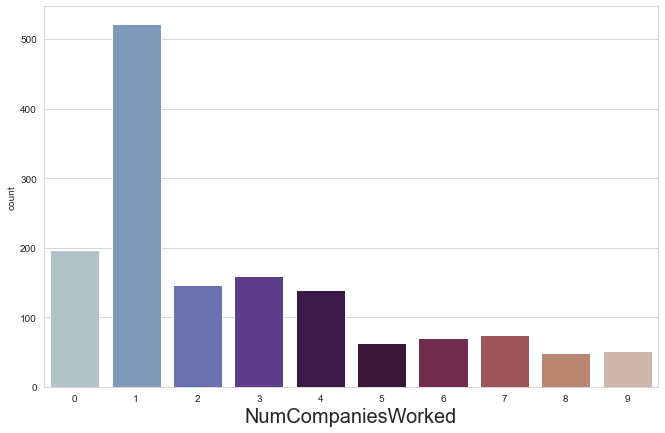

In [438]:
# Count plot of the NumCompaniesWorked column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['NumCompaniesWorked'], palette = 'twilight')
plt.xlabel('NumCompaniesWorked', fontsize = 20)

<AxesSubplot:xlabel='NumCompaniesWorked'>

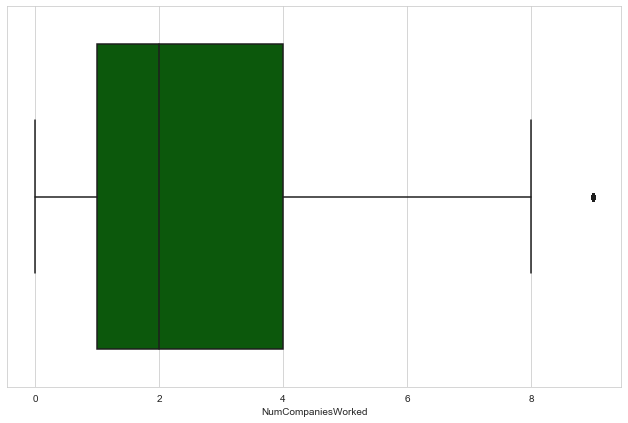

In [439]:
# boxplot of the MonthlyIncome column
plt.figure(figsize = (11,7))
sns.boxplot(data['NumCompaniesWorked'], color = 'darkgreen')

Analysis of ```NumCompaniesWorked``` column:
* Data in NumCompaniesWorked is continuous telling the past experience in number of the companies of the employee.
* minimum is 0 and maximum is 9 which means company have fresher employee and maximum 9 companies experience an employee have.
* data is rightly skewed as maximum employee have either 0 or 1 companies experience in the past. and very few employee have 5 to 9 companie's experience but still company have good amount of experienced employee.
* Boxplot plot is showing 9 as a outlier but if we will remove this outlier we are going to loose almost 50 employees data we will see how to deal with it later.

### 22. Over18.

In [440]:
# description of the Over18 column
data['Over18'].describe()

count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object

In [441]:
# value counts of the Over18 column
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

<AxesSubplot:xlabel='Over18', ylabel='count'>

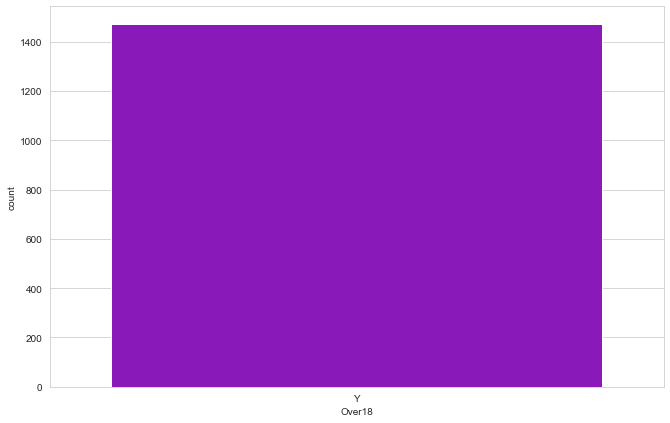

In [442]:
# distribution plot of the Over18 column
plt.figure(figsize = (11,7))
sns.countplot(data['Over18'], color = 'darkviolet')

Analysis of ```Over18``` column:
* This column is stating that whether an employee is over 18 years of age or not.
* We already have one column regarding the Age of the employee where we have seen that minimum age of an employee in the organization is 18 years old.
* this is a categorical column having only one category as YES because every employee is over 18 years of age in the organization.
* So this column has no use in our machine learning model because it is same for every column and target.

### 23. OverTime.

In [443]:
# description of the OverTime column
data['OverTime'].describe()

count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object

In [444]:
# value counts of the OverTime column
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

Text(0.5, 0, 'OverTime')

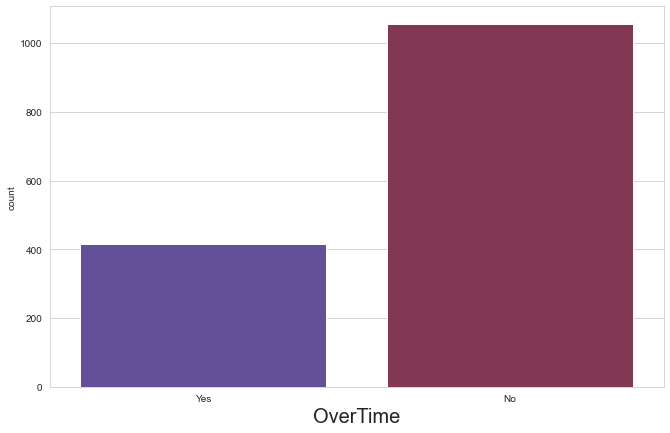

In [445]:
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['OverTime'], palette = 'twilight')
plt.xlabel('OverTime', fontsize = 20)

Analysis of ```OverTime``` column:
* Column is stating that whether an employee does over time duty apart from the standard time or not.
* it is a categorical column having Yes & No two categories..
* Only about 400 employees do over time.
* Maximum people don't do over time.
* column's data type is object need to convert into numeric.

#### Encoding of the ```OverTime``` column.

In [446]:
OverTime = leb_enc.fit_transform(data['OverTime'])
data['OverTime'] = OverTime
data['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int32

<AxesSubplot:xlabel='OverTime', ylabel='count'>

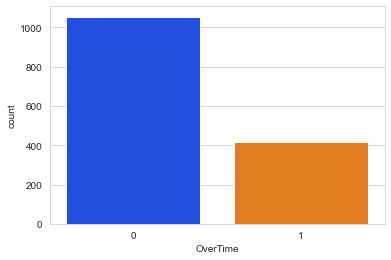

In [447]:
sns.countplot(data['OverTime'])

Lebal Encoder has converted No to 0 and Yes to 1

### 24. PercentSalaryHike.

In [448]:
# description of the PercentSalaryHike column
data['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [449]:
# value counts of the PercentSalaryHike column
data['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

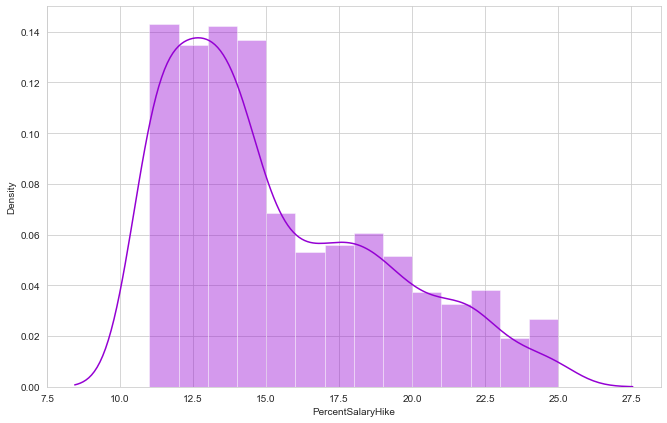

In [450]:
# distribution plot of the PercentSalaryHike column
plt.figure(figsize = (11,7))
sns.distplot(data['PercentSalaryHike'], color = 'darkviolet')

Text(0.5, 0, 'PercentSalaryHike')

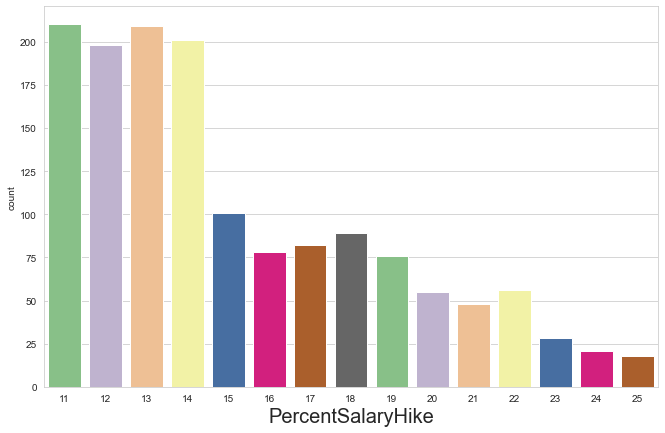

In [451]:
# Count plot of the PercentSalaryHike column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['PercentSalaryHike'], palette = 'Accent')
plt.xlabel('PercentSalaryHike', fontsize = 20)

<AxesSubplot:xlabel='PercentSalaryHike'>

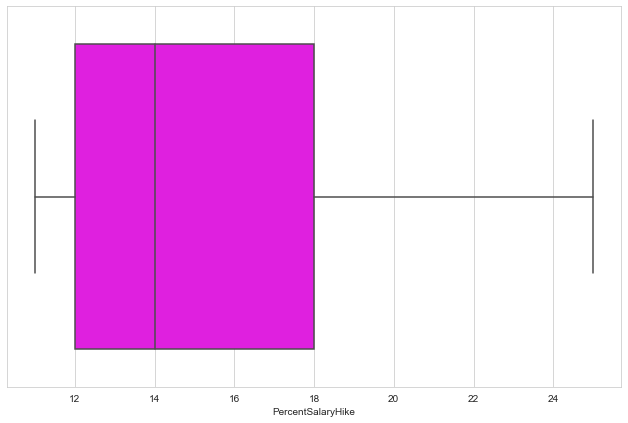

In [452]:
# boxplot of the PercentSalaryHike column
plt.figure(figsize = (11,7))
sns.boxplot(data['PercentSalaryHike'], color = 'magenta')

Analysis of ```PercentSalaryHike``` column:
* Column is stating about the salary hike an employee is getting in the organization.
* Minimum salary Hike is 11% and maximum is 25%.
* data is continuous
* Data is right skewed little bit not having perfactly bell curved shape. Around 60% employee are having 11% to 14% hike so maximum data points are 11 to 14 and rest of data is spread till 25 that is why little rightly skewed.
* Boxplot is showing no outliers so we don't need to worry anything else.

### 25. PerformanceRating

In [453]:
# description of the PerformanceRating column
data['PerformanceRating'].describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [454]:
# value counts of the PerformanceRating column
data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

Text(0.5, 0, 'PerformanceRating')

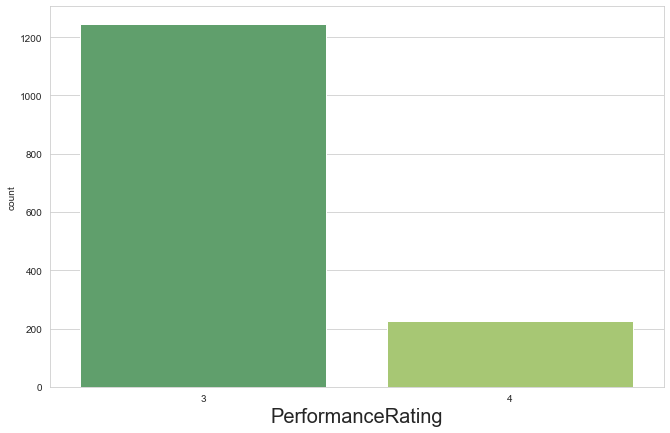

In [455]:
# Count plot of the PerformanceRating column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['PerformanceRating'], palette = 'summer')
plt.xlabel('PerformanceRating', fontsize = 20)

Analysis of ```PerformanceRating``` column:
* PerformanceRating column is about the rating of an employee towards his/her performance.
* All the employees of the organization has been divided into 2 ratings only 3 & 4.
* 1244 employee got rating 3 and 226 employee got rating 4.
* can be interpreted as no employee is worse performer to get rating 1 or 2 and not enough best performer to get rating 5.
* this column is categorical column and data type of the column is integer.

### 26. RelationshipSatisfaction.

In [456]:
# description of the RelationshipSatisfaction column
data['RelationshipSatisfaction'].describe()

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

In [457]:
# value counts of the RelationshipSatisfaction column
data['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

Text(0.5, 0, 'RelationshipSatisfaction')

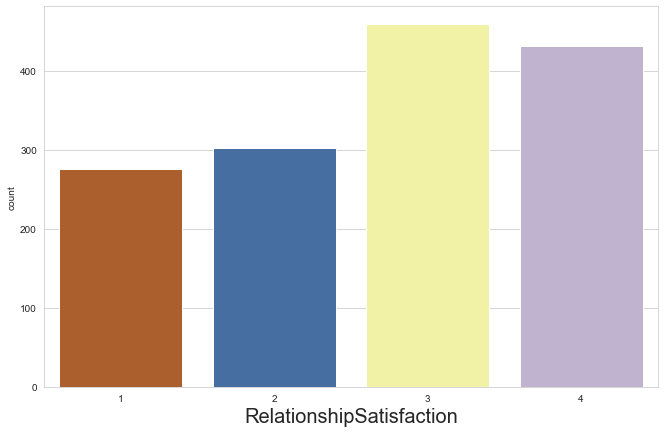

In [458]:
# Count plot of the RelationshipSatisfaction column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['RelationshipSatisfaction'], palette = 'Accent_r')
plt.xlabel('RelationshipSatisfaction', fontsize = 20)

Analysis of ```RelationshipSatisfaction``` column:
* Column is stating remarks of satisfaction toward some kind of relationship maybe relationship with the colleagues.
* It's a categorical column having 4 categories 1, 2 ,3 & 4. 1 for worst relationship satisfaction and 4 for most satisfaction.
* most employee stats thier relationship satisfaction 3 followed by 4, that maximum people are showing well satisfactory.
* satisfaction level 1 has least number of employee 276.

### 27. StandardHours.

In [459]:
# description of the StandardHours column
data['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

In [460]:
# value counts of the StandardHours column
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

Text(0.5, 0, 'StandardHours')

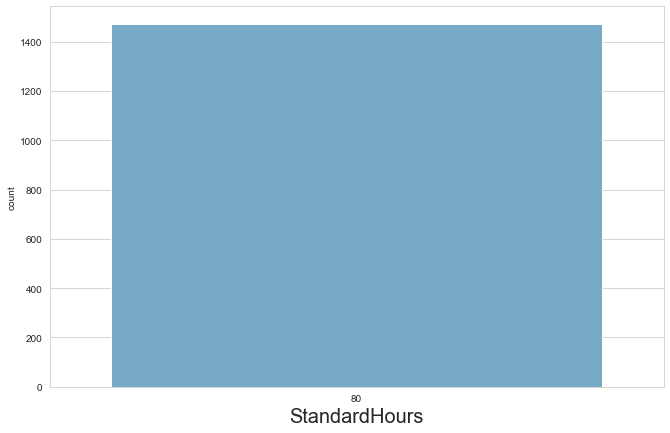

In [461]:
# Count plot of the StandardHours column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['StandardHours'], palette = 'Blues')
plt.xlabel('StandardHours', fontsize = 20)

Analysis of ```StandardHour``` column:
* This column is stating about the standard hour of work of an employee.
* all 1470 employee has same standard thus the value is same for every row which is 80.
* Because the value is same for every row this would be of no use in machine learning model building we will drop this column later.

### 28. StockOptionLevel.

In [462]:
# description of the StockOptionLevel column
data['StockOptionLevel'].describe()

count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

In [463]:
# value counts of the StockOptionLevel column
data['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

Text(0.5, 0, 'StockOptionLevel')

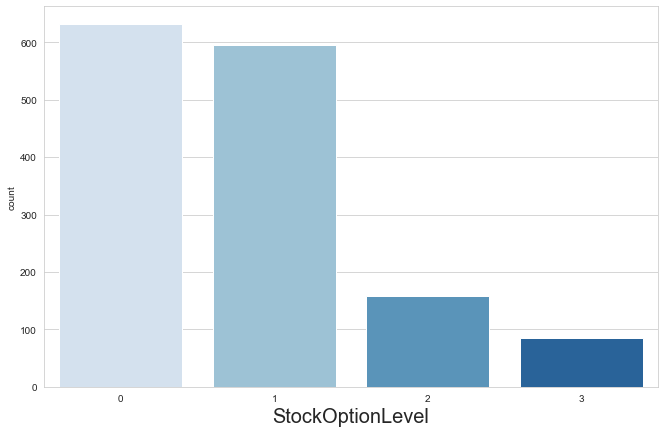

In [464]:
# Count plot of the StockOptionLevel column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['StockOptionLevel'], palette = 'Blues')
plt.xlabel('StockOptionLevel', fontsize = 20)

Analysis of ```StockOptionLevel``` column:
* This column is stating some kind of level of an employee in stock options may be right to purchase the shares of the company.
* 4 levels are there 0, 1, 2 & 3.
* 631 employee have 0 level of stock option and this is the maximum count followed by level 1 having 596 counts.
* only 85 employee have level 3 of stock option and 158 employees are at levcel 2.
* This column is categorical column and having integer data type.

### 29. TotalWorkingYears.

In [465]:
# description of the TotalWorkingYears column
data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

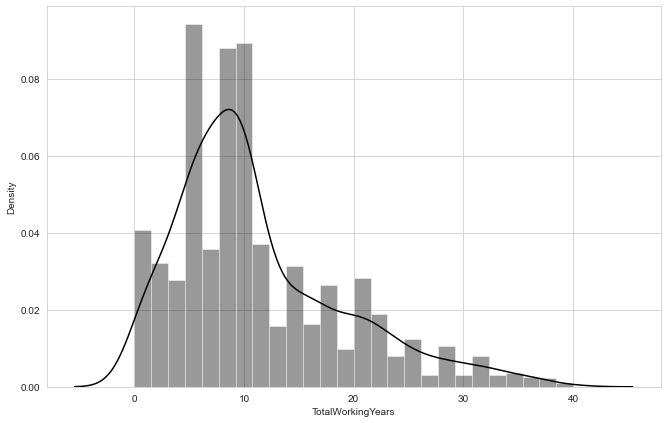

In [466]:
# distribution plot of the TotalWorkingYears column
plt.figure(figsize = (11,7))
sns.distplot(data['TotalWorkingYears'], color = 'black')

Text(0.5, 0, 'TotalWorkingYears')

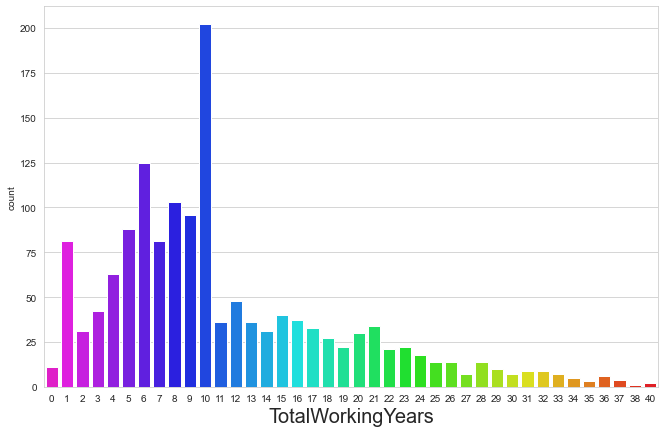

In [467]:
# Count plot of the TotalWorkingYears column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['TotalWorkingYears'], palette = 'gist_rainbow_r')
plt.xlabel('TotalWorkingYears', fontsize = 20)

<AxesSubplot:xlabel='TotalWorkingYears'>

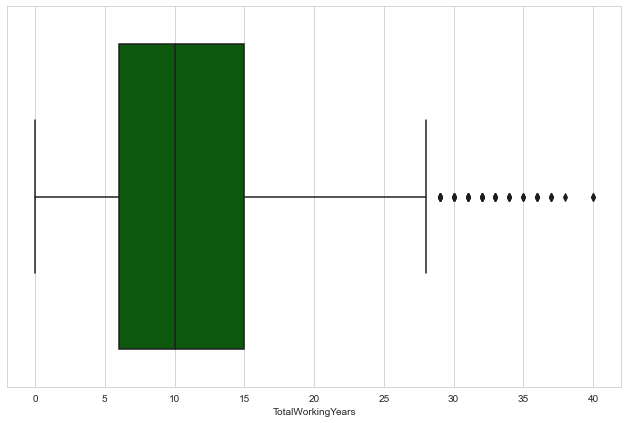

In [468]:
# boxplot of the TotalWorkingYears column
plt.figure(figsize = (11,7))
sns.boxplot(data['TotalWorkingYears'], color = 'darkgreen')

Analysis of ```TotalWorkingYears``` column:
* This column is about the total work experience of an employee in years.
* The data inside the column is continuous.
* Minimum working years is 0 those who are freshers and maximum working year is 40 years means there are employee having 40 years of work experience.
* The data is rightly skewed as the maximum people are under 0 to 10 years of working years and very few people are ranging from 11 years to 40 years.
* The box plot is showing some outliers, we'll deal with it later.

### 30. TrainingTimesLastYear.

In [469]:
# description of the TrainingTimesLastYear column
data['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [470]:
# value counts of the TrainingTimesLastYear column
data['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

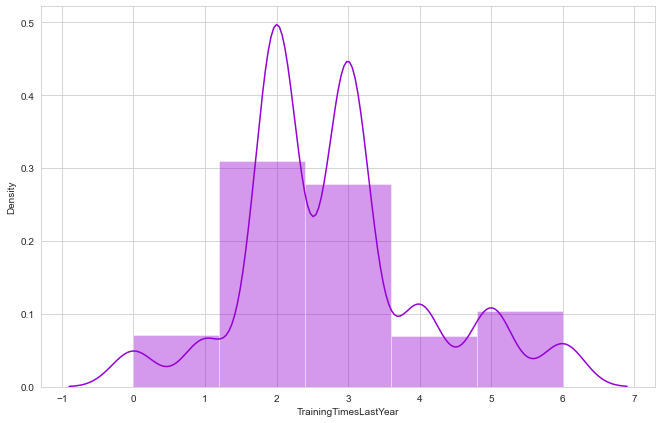

In [471]:
# distribution plot of the TrainingTimesLastYear column
plt.figure(figsize = (11,7))
sns.distplot(data['TrainingTimesLastYear'], color = 'darkviolet', bins = 5)

Text(0.5, 0, 'TrainingTimesLastYear')

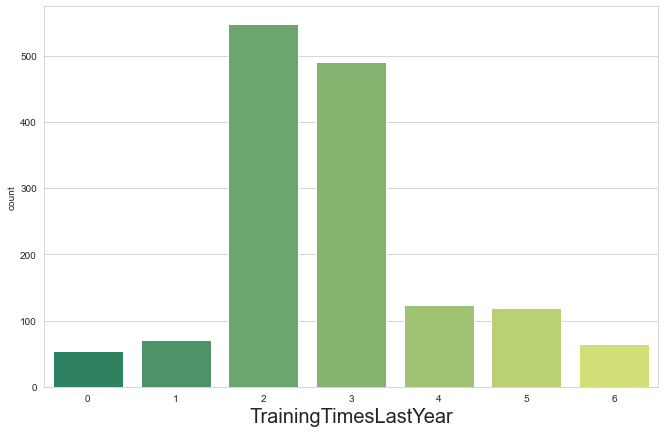

In [472]:
# Count plot of the TrainingTimesLastYear column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['TrainingTimesLastYear'], palette = 'summer')
plt.xlabel('TrainingTimesLastYear', fontsize = 20)

<AxesSubplot:xlabel='TrainingTimesLastYear'>

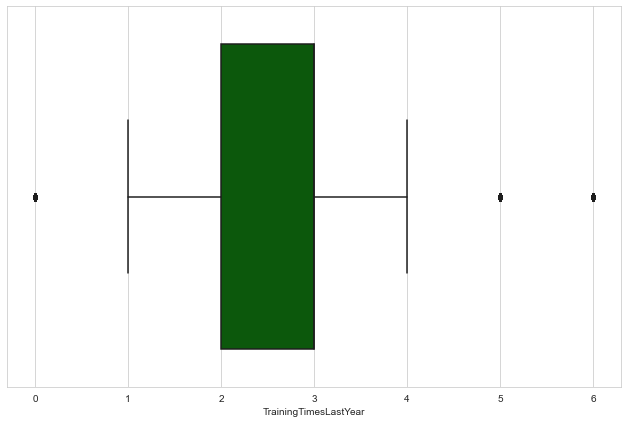

In [473]:
# boxplot of the TrainingTimesLastYear column
plt.figure(figsize = (11,7))
sns.boxplot(data['TrainingTimesLastYear'], color = 'darkgreen')

Analysis of ```TrainingTimesLastYear``` column:
* This column is about number of times an employee had training last year.
* Number of training starts from 0 to 6, means least time training is 0 and maximum time training is 6 an employee had.
* The data is continuous.
* Maximum employee had 2 times and 3 times training.
* The data is both left and right skewed.
* Boxplot is showing outliers both side.
* we will clean this data later.

### 31. WorkLifeBalance.

In [474]:
# description of the WorkLifeBalance column
data['WorkLifeBalance'].describe()

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

In [475]:
# value counts of the WorkLifeBalance column
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

Text(0.5, 0, 'WorkLifeBalance')

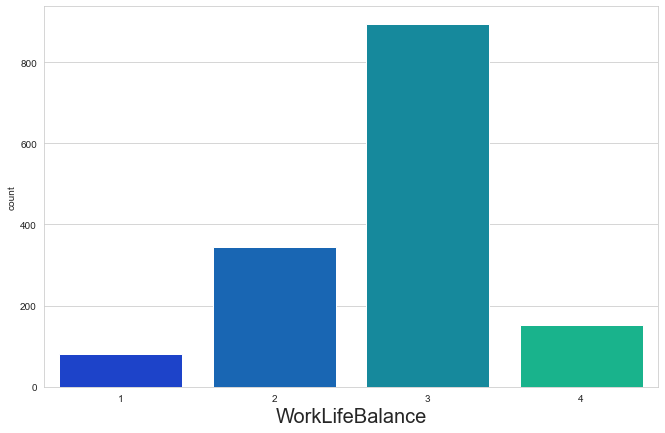

In [476]:
# Count plot of the WorkLifeBalance column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['WorkLifeBalance'], palette = 'winter')
plt.xlabel('WorkLifeBalance', fontsize = 20)

Analysis of ```WorkLifeBalance``` column:
* This column is about employees worklife balance rating, may be 1 for poor balance and 4 for good balance.
* This data is categorical.
* Data type is integers.
* maximum people has given 3 rating to the balance followed by rating 2, 1 rating has least counts.

### 32. YearsAtCompany.

In [477]:
# description of the YearsAtCompany column
data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

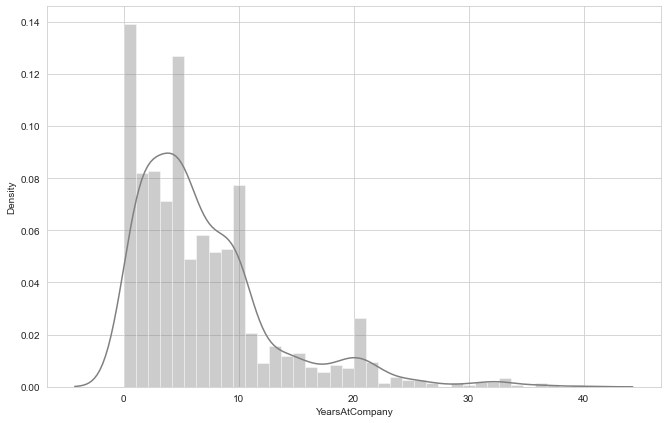

In [478]:
# distribution plot of the YearsAtCompany column
plt.figure(figsize = (11,7))
sns.distplot(data['YearsAtCompany'], color = 'gray')

Text(0.5, 0, 'YearsAtCompany')

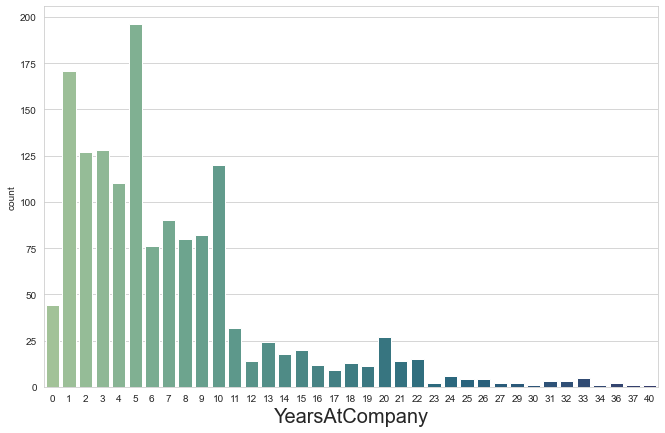

In [479]:
# Count plot of the YearsAtCompany column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['YearsAtCompany'], palette = 'crest')
plt.xlabel('YearsAtCompany', fontsize = 20)

<AxesSubplot:xlabel='YearsAtCompany'>

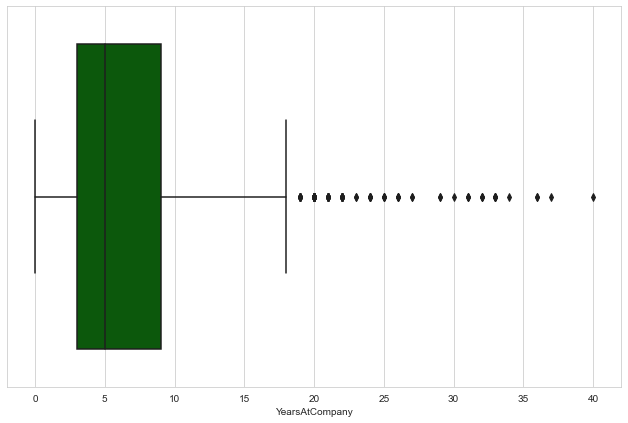

In [480]:
# boxplot of the YearsAtCompany column
plt.figure(figsize = (11,7))
sns.boxplot(data['YearsAtCompany'], color = 'darkgreen')

Analysis of ```YearsAtCompany``` column:
* This column is about number of years an employee has worked in current company.
* The data is start from 0 and goes upto 40 years.
* The data is continuous.
* Data type is integer.
* The data is heavily right skewed as most employee has worked under 10 years in current company and there are some employee who is working in the same company ranging from 11 years to 40 years which is making it right skewed.
* Boxplot is showing lots of outliers at right upper side.
* we will fix this issue later.

### 33. YearsInCurrentRole.

In [481]:
# description of the YearsInCurrentRole column
data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

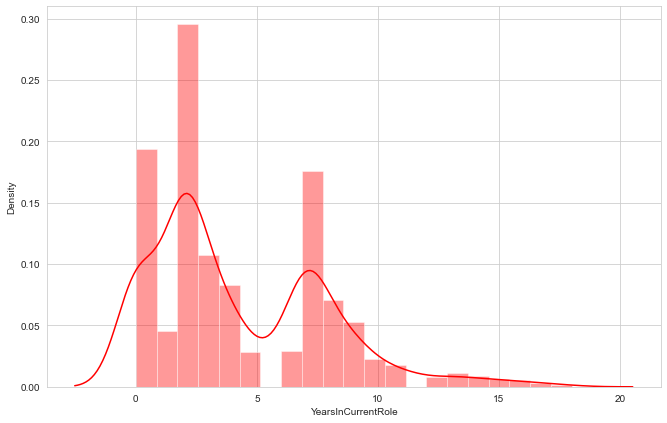

In [482]:
# distribution plot of the YearsInCurrentRole column
plt.figure(figsize = (11,7))
sns.distplot(data['YearsInCurrentRole'], color = 'red')

Text(0.5, 0, 'YearsInCurrentRole')

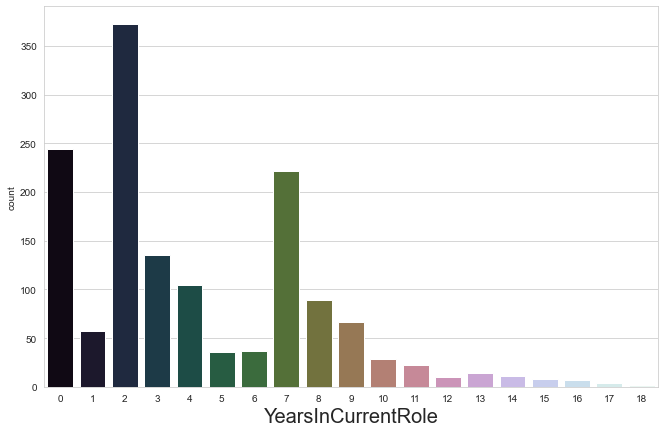

In [483]:
# Count plot of the YearsInCurrentRole column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['YearsInCurrentRole'], palette = 'cubehelix')
plt.xlabel('YearsInCurrentRole', fontsize = 20)

<AxesSubplot:xlabel='YearsInCurrentRole'>

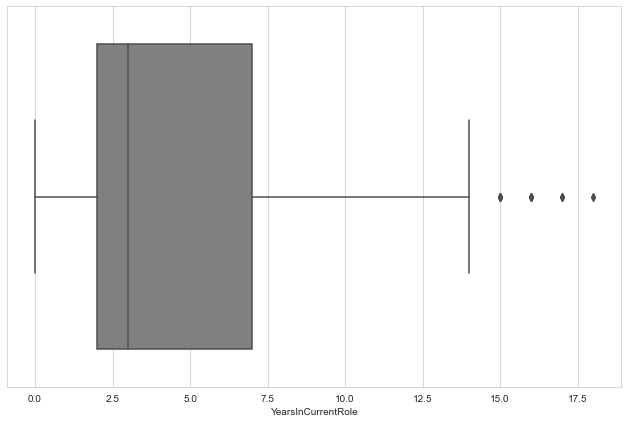

In [484]:
# boxplot of the YearsInCurrentRole column
plt.figure(figsize = (11,7))
sns.boxplot(data['YearsInCurrentRole'], color = 'gray')

Analysis of ```YearsInCurrentRole``` column:
* This column is about the number of years an employee is working in current role.
* The data vary from 0 to 18 years mean an employee is working under current role from 0 years to maximum 18 years.
* 75% employees are working under current role upto 7 years and rest 25% is from 8 years to 18 years which is making it right skewed data.
* Boxplot is showing some outliers at upper side.
* The data is continuous.
* Data type is integers.

### 34. YearsSinceLastPromotion.

In [485]:
# description of the YearsSinceLastPromotion column
data['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

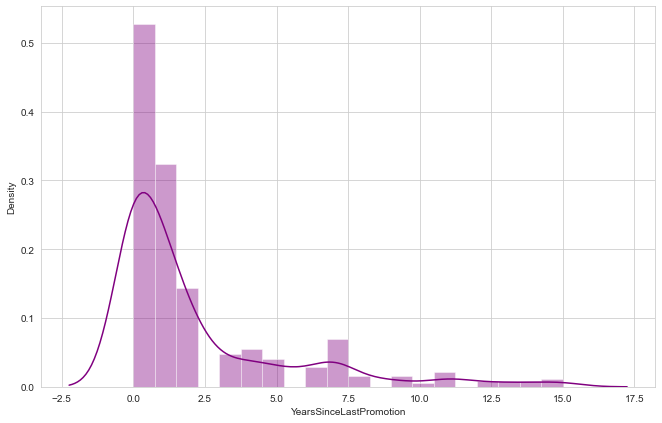

In [486]:
# distribution plot of the YearsSinceLastPromotion column
plt.figure(figsize = (11,7))
sns.distplot(data['YearsSinceLastPromotion'], color = 'purple', bins = 20)

Text(0.5, 0, 'YearsSinceLastPromotion')

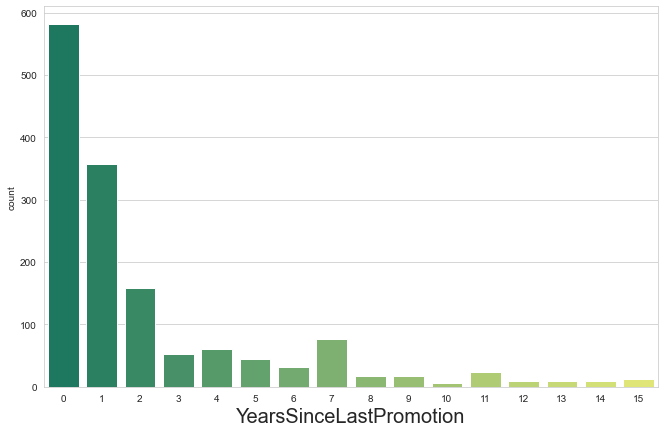

In [487]:
# Count plot of the YearsSinceLastPromotion column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['YearsSinceLastPromotion'], palette = 'summer')
plt.xlabel('YearsSinceLastPromotion', fontsize = 20)

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

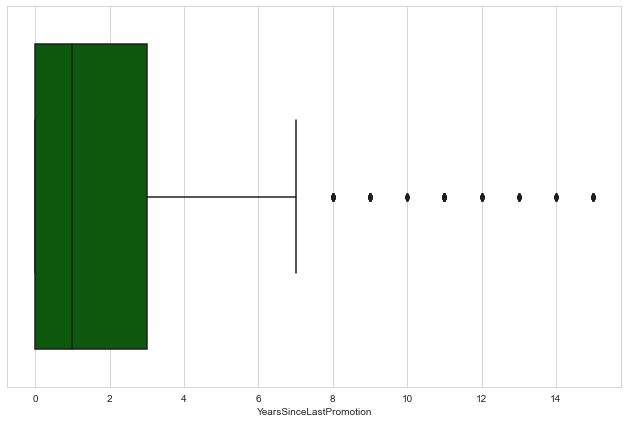

In [488]:
# boxplot of the YearsSinceLastPromotion column
plt.figure(figsize = (11,7))
sns.boxplot(data['YearsSinceLastPromotion'], color = 'darkgreen')

Analysis of ```YearsSinceLastPromotion``` column:
* This column is about how many years happened for an employee since he/she had his/her last promotion in the company.
* Minimum gap since last promotion is 0 years means recently promoted or no promotion and maximum gap is 15 years means some employees haven't their promotion since last 15 years that's interesting.
* 50% employee had last promotion within 1 year and then it varies till 15 year which is making it right skewed.
* Boxplot is showing good amount of outliers at upper side.
* Data is continuous.
* Data type is integers.

### 35. YearsWithCurrManager.

In [489]:
# description of the YearsWithCurrManager column
data['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [490]:
# value counts of the YearsWithCurrManager column
data['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

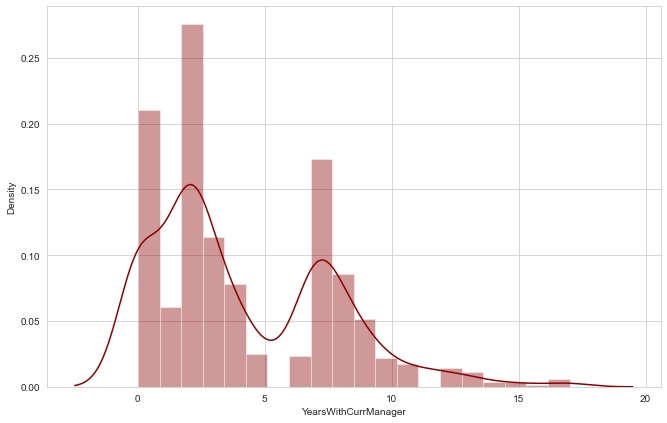

In [491]:
# distribution plot of the YearsWithCurrManager column
plt.figure(figsize = (11,7))
sns.distplot(data['YearsWithCurrManager'], color = 'darkred')

Text(0.5, 0, 'YearsWithCurrManager')

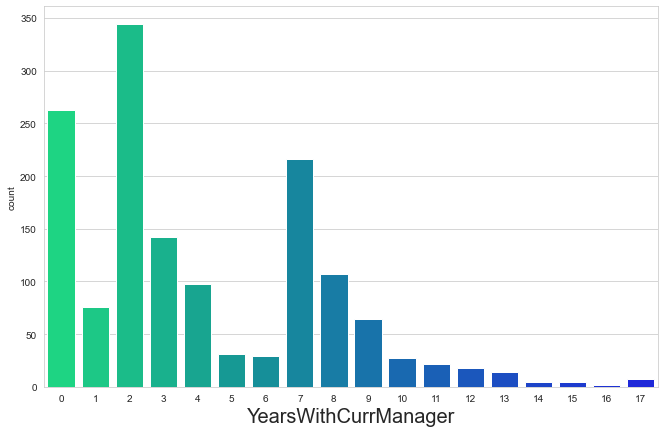

In [492]:
# Count plot of the YearsWithCurrManager column
plt.figure(figsize = (11,7))
sns.set_style('whitegrid')
sns.countplot(data['YearsWithCurrManager'], palette = 'winter_r')
plt.xlabel('YearsWithCurrManager', fontsize = 20)

<AxesSubplot:xlabel='YearsWithCurrManager'>

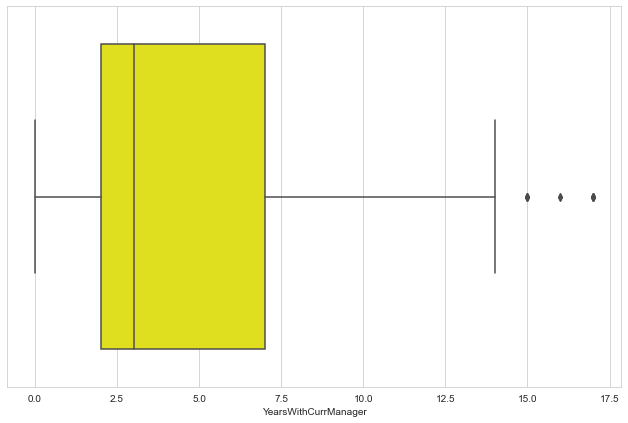

In [493]:
# boxplot of the YearsWithCurrManager column
plt.figure(figsize = (11,7))
sns.boxplot(data['YearsWithCurrManager'], color = 'yellow')

Analysis of ```YearsWithCurrManager``` column:
* This column is about since how many years an employee is working under the same manager.
* The number of years under the same manager varies from 0 years to 17 years.
* 50% employee is working under the same manager sice 3 years and 75% employee is working since 7 years but this data is goes till 17 years for rest of 25% employee which is making it right skewed data and boxplot is showing outliers at right side too.
* The data is continuous and data type is integer.

In [494]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [496]:
# correlation of the data
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


Earlier while data analysis of the columns we encountered 4 such columns for which we felt no use in our model building.
* EmployeeCount
* EmployeeNumber
* Over18
* StandardHours

Here we can see that EmployeeCount and StandardHours has no relation with any of column showing NaN in the matrix table, so we are going to drop them also The relation of EmployeeNumber with every column is not even 0.1 all relation are less than 0.1 which again proves that we need to drop this column. Over18 column is now a object datatype that is why it's not in the matrix, if it would have in matrix it's relation with all other column would be Nan because only one type of data is present in that column, so first of all we are going to drop all these column which we discussed here.

In [497]:
# Droping columns
data = data.drop(columns = ['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [498]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

All four columns have been droped from the data set. Now we will check for the correlation again and we'll see if we could find anything.

In [499]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


After analyzing the correlation table I have categorized the observation in 3 points.
* There are very few relations direct or inverse having more than 50% relation of columns with some other column.
* Some few columns have relations 10 to 40% with other columns, direct or inverse.
* And rest of relations are less than 10% 

**Highly Related Columns**
1. Age - JobLevel
2. Age - MonthlyIncome
3. Age - TotalWorkingYears
4. Department - JobRole
5. PercentSalaryHike - PerformanceRating
6. Marital status - StockOptionLevel
7. TotalWorkingYears - JobLevel
8. TotalWorkingYears - MonthlyIncome
9. TotalWorkingYears - YearsAtCompany
10. YearsAtCompany - YearsInCurrentRole
11. YearsAtCompany - YearsSinceLastPromotion
12. YearsAtCompany - YearsWithCurrManager
13. YearsAtCompany - JobLevel
14. YearsInCurrentRole - YearsSinceLastPromotion
15. YearsAtCompany - YearsWithCurrManager
16. YearsSinceLast - YearsWithCurrManager

These columns are highly related to each other compare to other relations, there could be combinations having more than 50% relation which are hiding in DataFrame. Apart from this are are also relations having 20 to 50% relationship which I am not mentioning below and rest of the relation in combinations are less than 10%.



# Outliers Removing

While analysis of all columns we found 8 continuous features with outliers, those columns are:
* MonthlyIncome
* NumCompaniesWorked
* TotalWorkingYears
* TrainingTimesLastYears
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

Let's remove outliers...

### Removing Outliers with IQR.

In [500]:
# setting inter quantile range

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

# IQR
iqr = q3 - q1

In [502]:
# Getting the range from where outliers starts in MonthlyIncome column
MonthlyIncome_high = (q3.MonthlyIncome + (1.5 * iqr.MonthlyIncome))
MonthlyIncome_high

16581.0

In [503]:
# instantiating all those row in an index where outliers are present
index = np.where(data['MonthlyIncome'] > MonthlyIncome_high)
index

(array([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,  165,
         186,  187,  190,  194,  231,  233,  237,  244,  257,  263,  270,
         279,  280,  290,  314,  326,  329,  379,  392,  400,  411,  417,
         425,  429,  445,  466,  473,  477,  489,  497,  535,  538,  561,
         568,  584,  588,  592,  595,  609,  653,  699,  710,  714,  716,
         741,  746,  749,  755,  766,  770,  774,  799,  804,  810,  814,
         851,  858,  861,  867,  869,  894,  898,  899,  904,  907,  913,
         916,  918,  922,  936,  937,  945,  954,  955,  956,  999, 1008,
        1009, 1024, 1043, 1055, 1080, 1116, 1126, 1129, 1135, 1140, 1154,
        1184, 1185, 1225, 1242, 1264, 1277, 1330, 1331, 1348, 1351, 1374,
        1377, 1401, 1437, 1443], dtype=int64),)

In [504]:
# droping the indexes with outliers
Data1 = data.drop(data.index[index])

In [505]:
Data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [506]:
# removing higher side outliers from NumCompaniesWorked
index = np.where(Data1['NumCompaniesWorked'] > (q3.NumCompaniesWorked + (1.5 * iqr.NumCompaniesWorked)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1305,1466,39,0,2,613,1,6,1,3,4,...,3,1,1,9,5,3,7,7,1,7
1306,1467,27,0,2,155,1,4,3,1,2,...,4,2,1,6,0,3,6,2,0,3
1307,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [507]:
# removing higher side outliers from TotalWorkingYears
index = np.where(Data1['TotalWorkingYears'] > (q3.TotalWorkingYears + (1.5 * iqr.TotalWorkingYears)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1276,1466,39,0,2,613,1,6,1,3,4,...,3,1,1,9,5,3,7,7,1,7
1277,1467,27,0,2,155,1,4,3,1,2,...,4,2,1,6,0,3,6,2,0,3
1278,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [508]:
# removing higher side outliers from TrainingTimesLastYear
index = np.where(Data1['TrainingTimesLastYear'] > (q3.TrainingTimesLastYear + (1.5 * iqr.TrainingTimesLastYear)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
4,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,1464,26,0,2,1167,2,5,3,4,4,...,3,4,0,5,2,3,4,2,0,0
1109,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1110,1467,27,0,2,155,1,4,3,1,2,...,4,2,1,6,0,3,6,2,0,3
1111,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [509]:
# removing lower side outliers from TrainingTimesLastYear
index = np.where(Data1['TrainingTimesLastYear'] < (q1.TrainingTimesLastYear - (1.5 * iqr.TrainingTimesLastYear)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
1,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
2,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
3,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
4,6,59,0,2,1324,1,3,3,3,3,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,1463,31,0,0,325,1,5,3,3,2,...,3,2,0,10,2,3,9,4,1,7
1064,1464,26,0,2,1167,2,5,3,4,4,...,3,4,0,5,2,3,4,2,0,0
1065,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1066,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [510]:
# removing higher side outliers from YearsAtCompany
index = np.where(Data1['YearsAtCompany'] > (q3.YearsAtCompany + (1.5 * iqr.YearsAtCompany)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
1,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
2,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
3,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
4,6,59,0,2,1324,1,3,3,3,3,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1463,31,0,0,325,1,5,3,3,2,...,3,2,0,10,2,3,9,4,1,7
1026,1464,26,0,2,1167,2,5,3,4,4,...,3,4,0,5,2,3,4,2,0,0
1027,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1028,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [511]:
# removing higher side outliers from YearsInCurrentRole

index = np.where(Data1['YearsInCurrentRole'] > (q3.YearsInCurrentRole + (1.5 * iqr.YearsInCurrentRole)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
1,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
2,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
3,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
4,6,59,0,2,1324,1,3,3,3,3,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1463,31,0,0,325,1,5,3,3,2,...,3,2,0,10,2,3,9,4,1,7
1023,1464,26,0,2,1167,2,5,3,4,4,...,3,4,0,5,2,3,4,2,0,0
1024,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
1025,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [512]:
# removing higher side outliers from YearsSinceLastPromotion

index = np.where(Data1['YearsSinceLastPromotion'] > (q3.YearsSinceLastPromotion + (1.5 * iqr.YearsSinceLastPromotion)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
1,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
2,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
3,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
4,6,59,0,2,1324,1,3,3,3,3,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1463,31,0,0,325,1,5,3,3,2,...,3,2,0,10,2,3,9,4,1,7
984,1464,26,0,2,1167,2,5,3,4,4,...,3,4,0,5,2,3,4,2,0,0
985,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
986,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [513]:
# removing higher side outliers from YearsWithCurrManager

index = np.where(Data1['YearsWithCurrManager'] > (q3.YearsWithCurrManager + (1.5 * iqr.YearsWithCurrManager)))
Data1 = Data1.drop(Data1.index[index])
Data1.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,49,0,1,279,1,8,1,1,3,...,4,4,1,10,3,3,10,7,1,7
1,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
2,3,33,0,1,1392,1,3,4,1,4,...,3,3,0,8,3,3,8,7,3,0
3,5,32,0,1,1005,1,2,2,1,4,...,3,3,0,8,2,2,7,7,3,6
4,6,59,0,2,1324,1,3,3,3,3,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1463,31,0,0,325,1,5,3,3,2,...,3,2,0,10,2,3,9,4,1,7
981,1464,26,0,2,1167,2,5,3,4,4,...,3,4,0,5,2,3,4,2,0,0
982,1465,36,0,1,884,1,23,2,3,3,...,3,3,1,17,3,3,5,2,0,3
983,1468,49,0,1,1023,2,2,3,3,4,...,3,4,0,17,3,2,9,6,0,8


In [514]:
# Creating a new DataFrame having only those continuous coumn which had outliers

# Instantiating each column in an object having same name as columns
MonthlyIncome = Data1['MonthlyIncome']
NumCompaniesWorked = Data1['NumCompaniesWorked']
TotalWorkingYears = Data1['TotalWorkingYears']
TrainingTimesLastYear = Data1['TrainingTimesLastYear']
YearsAtCompany = Data1['YearsAtCompany']
YearsInCurrentRole = Data1['YearsInCurrentRole']
YearsSinceLastPromotion = Data1['YearsSinceLastPromotion']
YearsWithCurrManager = Data1['YearsWithCurrManager']

# creating new dataframe
OC = pd.DataFrame({})
OC['MonthlyIncome'] = MonthlyIncome
OC['NumCompaniesWorked'] = NumCompaniesWorked
OC['TotalWorkingYears'] = TotalWorkingYears
OC['TrainingTimesLastYear'] = TrainingTimesLastYear
OC['YearsAtCompany'] = YearsAtCompany
OC['YearsInCurrentRole'] = YearsInCurrentRole
OC['YearsSinceLastPromotion'] = YearsSinceLastPromotion
OC['YearsWithCurrManager'] = YearsWithCurrManager
OC

,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,5130,1,10,3,10,7,1,7
2,2090,6,7,3,0,0,0,0
3,2909,1,8,3,8,7,3,0
5,3068,0,8,2,7,7,3,6
6,2670,4,12,3,1,0,0,0
...,...,...,...,...,...,...,...,...
1463,9936,0,10,2,9,4,1,7
1464,2966,0,5,2,4,2,0,0
1465,2571,4,17,3,5,2,0,3
1468,5390,2,17,3,9,6,0,8


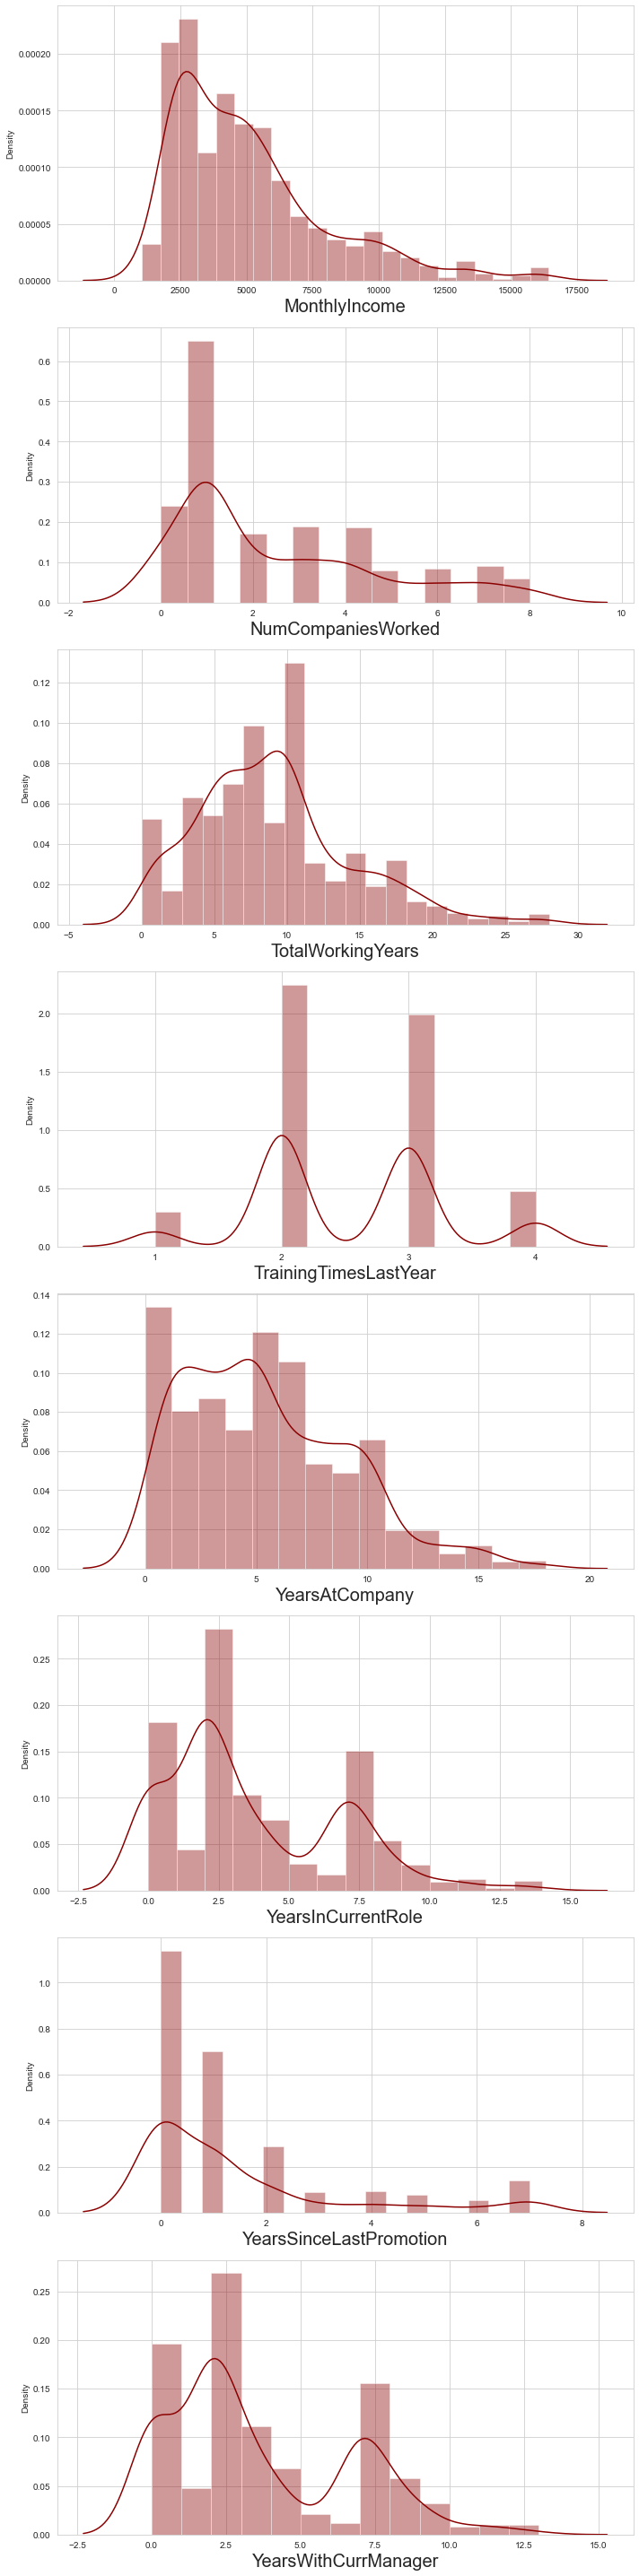

In [516]:
# plotting OC plot
plt.figure(figsize = (10,40))
plotnumber = 1

for columns in OC:
    if plotnumber <= 8:
        ax = plt.subplot(8,1,plotnumber)
        sns.distplot(OC[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

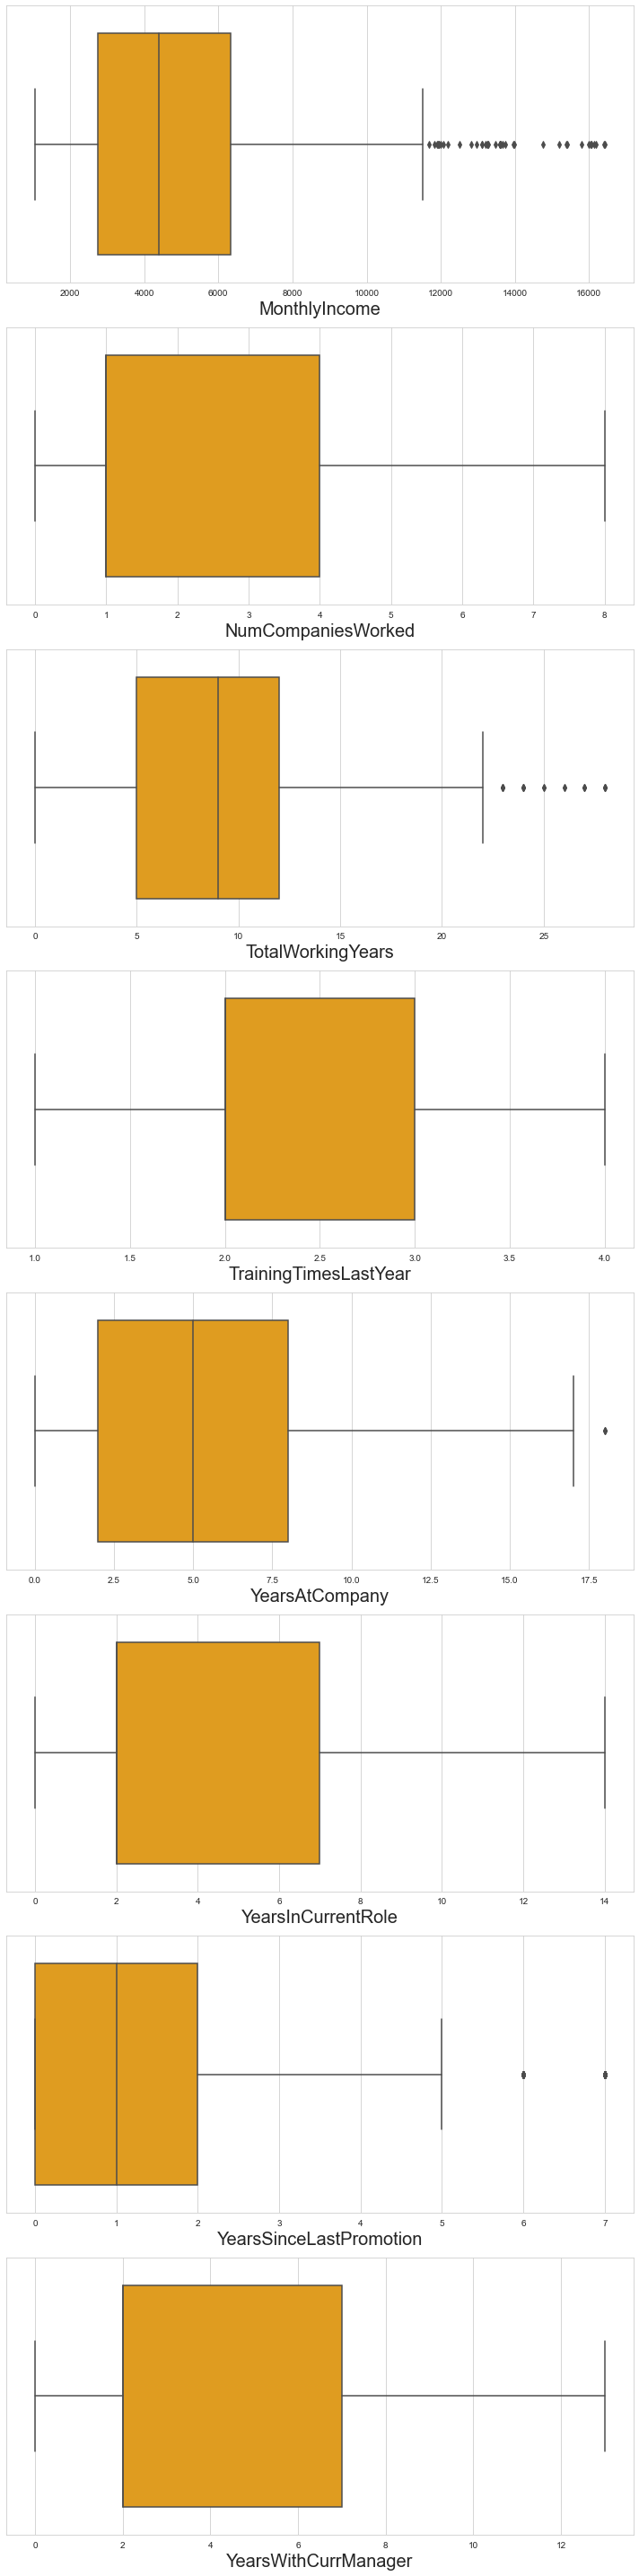

In [515]:
# plotting box plot
plt.figure(figsize = (10,40))
plotnumber = 1

for columns in OC:
    if plotnumber <= 8:
        ax = plt.subplot(8,1,plotnumber)
        sns.boxplot(OC[columns], color = 'orange', orient = 'vertical')
        plt.xlabel(columns, fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Great! We have removed the outliers but the only problem is we had lost 33% data. Alright now we have to go ahead from here as it is. We can see that even after removing outliers there are some columns they created a new inter quantile range and still they made some outliers again in the column which is showing that those data were so much skewed and had so much data at skewed points.

Now we are left with only one problem to be solved and that is class imbalanced, at the beginning of the project we discussed that our class data is highly imbalance which need to be sort out, now is the time.

## Over Sampling of Class Imbalance Data

In [530]:
Data1['Attrition'].describe()

count    985.000000
mean       0.175635
std        0.380702
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Attrition, dtype: float64

In [531]:
Data1['Attrition'].value_counts()

0    812
1    173
Name: Attrition, dtype: int64

#### Spliting the dataset into features and target variables

In [532]:
x = Data1.drop(columns = ['Attrition'])
y = Data1['Attrition']

In [538]:
# Installing imblearn
! pip install imblearn

In [540]:
# importing SMOTE from imblearn
from imblearn.over_sampling import SMOTE

In [541]:
# resampling the data
sm = SMOTE()
x_over, y_over = sm.fit_resample(x, y)

In [542]:
y_over.value_counts()

0    812
1    812
Name: Attrition, dtype: int64

Target variable has been resampled. Now the value for 0 and 1 in target column is equal, Now our dataset looks qyuite good for model building, Now, we can move ahead for model building from here. Here our EDA part is done now we will start the preprocessing.

# Preprocessing
### Scaling

In [545]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_over)

In [546]:
x_scaled

array([[ 1.83123871, -0.77306664, -1.31011379, ...,  1.40837593,
        -0.10842876,  1.42939424],
       [ 0.36798971,  0.73953604,  1.58912805, ..., -1.07078443,
        -0.6639124 , -1.04613192],
       [-0.11975996, -0.77306664,  1.63948052, ...,  1.40837593,
         1.00253851, -1.04613192],
       ...,
       [-0.48557221, -2.28566931,  1.32146496, ..., -0.3624529 ,
        -0.6639124 ,  0.01480786],
       [-0.3636348 ,  0.73953604,  0.46547308, ..., -1.07078443,
        -0.6639124 , -1.04613192],
       [-0.60750963, -0.77306664, -1.13785536, ..., -1.07078443,
        -0.6639124 , -1.04613192]])

Data has been Scaled. 

In [588]:
# importing all the machine Learning Classification Algorithms & metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve

### Finding Best Random State

In [552]:
max_accu = 0
best_rs = 0

for i in range(1, 2000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_over, test_size = 0.30, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Best Accuracy is :',max_accu, 'At Random State ', best_rs)

Best Accuracy is : 0.8790983606557377 At Random State  1607


We found the best random state for logistic regression, now we will create train test split and than we will start our model building.

### Creating Train Test Split

In [553]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_over, test_size = 0.25, random_state = 1607)

Preprocessing is done till here, we have created the train test split, found the best random State and scaled the feature data. Now we will start our model building process we will build 5 models for this data.
* Logistic Regression Model
* Knn Model
* Decision Tree Model
* Random Forest Model
* Support Vector Machine Model

After building the all 5 models we will cross validate it's accuracy and also will plot roc and auc curve to get best model for our data we will compare the minimum difference between model accuracy and cross validation score to the roc auc curve and will decide our best fit model accordingly.

# Machine Learning Model Building

## 1. Logistic Regression

In [554]:
# training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [556]:
# prediction of test data
y_pred = log_reg.predict(x_test)

In [557]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[185,  29],
       [ 18, 174]], dtype=int64)

In [561]:
# accuracy score
print('Accuracy Score for Logistic Regression is :',accuracy_score(y_test, y_pred))

Accuracy Score for Logistic Regression is : 0.8842364532019704


In [559]:
# calssification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       214
           1       0.86      0.91      0.88       192

    accuracy                           0.88       406
   macro avg       0.88      0.89      0.88       406
weighted avg       0.89      0.88      0.88       406



**Logistic Regression** is giving us 88.42% accuracy

## 2. K-Nearest Neighbors Model

In [566]:
# training and predicting with Knn model and getting metricses
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print('Confusion Matrix For Knn Model is :\n',confusion_matrix(y_test, y_pred_knn))

print('Accuracy Score for knn Model is :\n', accuracy_score(y_test,y_pred_knn))
print('Classification Report for knn Model is \n:', classification_report(y_test, y_pred_knn))

Confusion Matrix For Knn Model is :
 [[144  70]
 [  1 191]]
Accuracy Score for knn Model is :
 0.8251231527093597
Classification Report for knn Model is 
:               precision    recall  f1-score   support

           0       0.99      0.67      0.80       214
           1       0.73      0.99      0.84       192

    accuracy                           0.83       406
   macro avg       0.86      0.83      0.82       406
weighted avg       0.87      0.83      0.82       406



## 3. Decision Tree Classification Model

In [567]:
# training and predicting with Decision Tree model and getting metricses
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)
print('Confusion Matrix For Decision Tree Model is :\n',confusion_matrix(y_test, y_pred_dt))

print('Accuracy Score for Decision Tree Model is :\n', accuracy_score(y_test,y_pred_dt))
print('Classification Report for Decision Tree Model is \n:', classification_report(y_test, y_pred_dt))

Confusion Matrix For Decision Tree Model is :
 [[165  49]
 [ 25 167]]
Accuracy Score for Decision Tree Model is :
 0.8177339901477833
Classification Report for Decision Tree Model is 
:               precision    recall  f1-score   support

           0       0.87      0.77      0.82       214
           1       0.77      0.87      0.82       192

    accuracy                           0.82       406
   macro avg       0.82      0.82      0.82       406
weighted avg       0.82      0.82      0.82       406



## 4. Random Forest Classification Model

In [571]:
# training and predicting with Decision Tree model and getting metricses
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_rf = RF.predict(x_test)
print('Confusion Matrix For Random Forest Model is :\n',confusion_matrix(y_test, y_pred_rf), '\n')

print('Accuracy Score for Random Forest Model is :\n', accuracy_score(y_test,y_pred_rf), '\n')

print('Classification Report for Random Forest Model is :\n', classification_report(y_test, y_pred_rf))

Confusion Matrix For Random Forest Model is :
 [[196  18]
 [ 10 182]] 

Accuracy Score for Random Forest Model is :
 0.9310344827586207 

Classification Report for Random Forest Model is :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       214
           1       0.91      0.95      0.93       192

    accuracy                           0.93       406
   macro avg       0.93      0.93      0.93       406
weighted avg       0.93      0.93      0.93       406



## 5. Support Vector Machine Classification Model.

In [572]:
# training and predicting with Decision Tree model and getting metricses
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print('Confusion Matrix For Support Vector Machine Model is :\n',confusion_matrix(y_test, y_pred_svc), '\n')

print('Accuracy Score for Support Vector Machine Model is :\n', accuracy_score(y_test,y_pred_svc), '\n')

print('Classification Report for Support Vector Machine Model is :\n', classification_report(y_test, y_pred_svc))

Confusion Matrix For Support Vector Machine Model is :
 [[195  19]
 [ 19 173]] 

Accuracy Score for Support Vector Machine Model is :
 0.9064039408866995 

Classification Report for Support Vector Machine Model is :
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       214
           1       0.90      0.90      0.90       192

    accuracy                           0.91       406
   macro avg       0.91      0.91      0.91       406
weighted avg       0.91      0.91      0.91       406



We have built 5 Classification Machine Learning Algorithm and there score is as follows:-

 * **LogisticRegression Model**  Accuracy Score = ```0.8842364532019704```
 * **k-NearestNeighbors Model**  Accuracy Score = ```0.8251231527093597```
 * **DecisionTree Model**  Accuracy Score = ```0.8177339901477833```
 * **RandomForest Model**  Accuracy Score = ```0.9310344827586207```
 * **SupportVector Model**  Accuracy Score = ```0.9064039408866995```
 
All the 5 models have given the very good accuracy score, out of which the **Random Forest** has given the highest accuracy that is 93.10% and **Decision Tree** has given the lowest score that is 81.77%. 

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model but to be finalized we will also look for ROC AUC Curve.

# Cross-Validation of Models

In [573]:
# Importing the cross validation score
from sklearn.model_selection import cross_val_score

In [581]:
# cross validation for Logistic Regression
cvs = cross_val_score(log_reg, x_scaled, y_over, cv = 20)
print('Cross Validation Average Score of Logistic Regression Model is :', cvs.mean())

Cross Validation Average Score of Logistic Regression is : 0.8168096958747364


In [584]:
# cross validation k nearest neighbors
cvs = cross_val_score(knn, x_scaled, y_over, cv = 20)
print('Cross Validation Average Score of K-Nearest Neighbors Model is :', cvs.mean())

Cross Validation Average Score of K-Nearest Neighbors is : 0.829494128274616


In [585]:
# cross validation for Decision tree
cvs = cross_val_score(DT, x_scaled, y_over, cv = 20)
print('Cross Validation Average Score of Decision Tree Model is :', cvs.mean())

Cross Validation Average Score of Decision Tree Model is : 0.8044489611562783


In [586]:
# cross validation for Random Forest
cvs = cross_val_score(RF, x_scaled, y_over, cv = 20)
print('Cross Validation Average Score of Random Forest Model is :', cvs.mean())

Cross Validation Average Score of Random Forest Model is : 0.9091613971695273


In [587]:
# cross validation for support vector machine
cvs = cross_val_score(svc, x_scaled, y_over, cv = 20)
print('Cross Validation Average Score of Support Vector Machine Model is :', cvs.mean())

Cross Validation Average Score of Support Vector Machine Model is : 0.8957919301415236


We have successfully done with cross validation of all 5 models with **CV = 20** and got the result as follows:-

 * **LogisticRegression Model**  Cross Validation Score = ```0.8168096958747364```
 * **k-NearestNeighbors Model**  Cross Validation Score = ```0.829494128274616```
 * **DecisionTree Model**  Cross Validation Score = ```0.8044489611562783```
 * **RandomForest Model**  Cross Validation Score = ```0.9091613971695273```
 * **SupportVector Model**  Cross Validation Score = ```0.8957919301415236```
 
Now one thing is sure that ***Random Forest Classifier*** Machine learning algorithm has given the best score in both ```accuracy_score``` and ```cross_val_score```. But as we know we have to check for the minimum difference between ```accuracy_score``` and ```cross_val_score```, and whichever model has the minimum difference between ```accuracy_score``` and ```cross_val_score``` would be the best model. So to check that I have counted the difference of both on a excel sheet. The result is as follows:


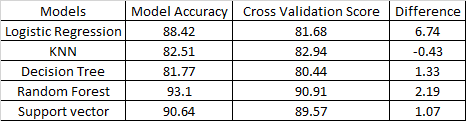

from this table we can see that cross validation Average of ***K-Nearest Neighbors*** with cv = 20 has performed even better than the actual model and thus it has difference in negetive(-0.43) means cross validation average score is even more than the actual model, So according to this theory our best fit model is ***K-Nearest Neighbors***.

We are going to plot the ```roc_auc_curve``` for our models then we will find out which model has largest ```roc_auc_score``` and if it matches with ***K-Nearest Neighbors*** we will finalize ***K-Nearest Neighbors*** as our final model and if it would be ***Random Forest*** than we will finalise ***Random Forest*** as our final model.

# AUC & ROC Curve

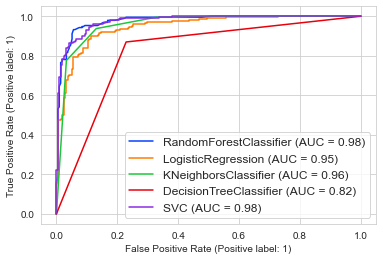

In [596]:
disp = plot_roc_curve(RF, x_test, y_test)
plot_roc_curve(log_reg, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(DT, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size':12}, loc = 'lower right')
plt.show()

Great! we have successfully ploted the ```roc_auc_curve``` and got the AUC score for all the models. We can see that that we have 2 winners with same score that is ```RandomForestClassifier``` and ```SupportVectorClassifier``` score for both the model is 98%. Before ploting the ```roc_auc_curve``` we already had a analysis of best model based on cross validation score difference with accuracy score and we got that ```KNeighborsClassifier``` had the negative difference and here we got 2 Models other than ```K-NearestNeighbors``` having highest accuracy score, so we are going to decide our best model based on ```auc_roc_curve``` and whichever the model from both the highest AUC Score Models would have the least difference between accuracy score and cross validation score  that model would be our final model to be saved for the project of HR-Analytics.

And we can see that ```SupportVectorClassifier``` has the least difference between both of these Models. So  ```SupportVectorClassifier```is going to be our final model.

Now we will do some Hyperparameter tuning with ```SupportVectorClassifier``` model to see if we can get the more accuracy with this model if possible. 

# Hyper Parameter Tuning

In [597]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [608]:
# setting the parameters
parameters = {'C': [0.1,1,100,1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [1,2,3,4,5,6,7,8,9]
              }

In [609]:
# setting the algorithm and parameters of algorithms in gridsearchcv
grid_search = GridSearchCV(svc, param_grid = parameters)

In [610]:
# training grid_search_cv
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [611]:
# best parameters out of provided parameters
grid_search.best_params_

{'C': 100, 'degree': 1, 'kernel': 'rbf'}

In [619]:
# Modifying the estimators of support vector machine from default to grid_search best parameters and training the model
supp_vect = grid_search.best_estimator_
supp_vect.fit(x_train, y_train)
y_pred_sv = supp_vect.predict(x_test)
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred_sv),'\n')
print('Accyracy Score :\n', accuracy_score(y_test, y_pred_sv),'\n')
print('Classification Report :\n', classification_report(y_test, y_pred_sv))

Confusion Matrix :
 [[195  19]
 [ 12 180]] 

Accyracy Score :
 0.9236453201970444 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       214
           1       0.90      0.94      0.92       192

    accuracy                           0.92       406
   macro avg       0.92      0.92      0.92       406
weighted avg       0.92      0.92      0.92       406



we have done with the Hyper Parameter Tuning with some good productivity as we increased our accuracy score by approximately 2% which is great Earlier the accuracy was 90.64%, now with hyperparameter tuning it increased upto 92.36%.

So we have done with our model building and we have ended up building ```Support Vector Classifier``` model for our **HR ANALYTICS PROJECT-ATTRITION PREDICTION**. Now we will save the model and after that our project is ready.

# Model Saving

In [620]:
# importing pickle to save the model
import pickle

In [621]:
# CREATING A FILE NAME AND DUMPING THE MODEL TO LOCAL SYSTEM
file_name = 'HR-Analytics, Attrition Prediction.pickle'
pickle.dump(supp_vect, open(file_name,'wb'))

File has been saved sucessfully. Let's check by predicting the loaded model.

# Loading The Saved Model & Predicting With It.

In [622]:
# loading the model with the name loaded_model
loaded_model = pickle.load(open(file_name,'rb'))

In [626]:
# predicting with the loaded model
Predicted = loaded_model.predict(x_test)[:]

In [624]:
actual = y_test

In [627]:
DF = pd.DataFrame([Predicted, y_test[:]], index = ['Predicted', 'Original'])
DF

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
Predicted,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,1,0,0,0,1
Original,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,1,0,0,0,1


# FINISHED

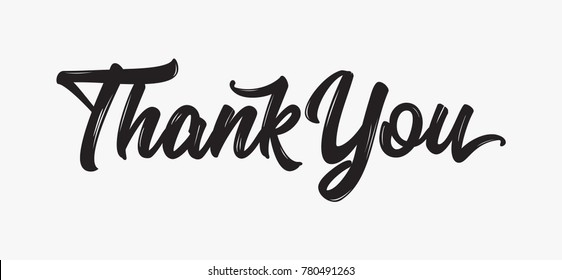